
**Data Glacier Internship**
**Final Project Notebook** 

Group:
Name:

Batch: LISUM11

Email:

Country:

Specialization: Data Science

Topic: Healthcare: Persistency of a Drug

Problem Description The problem given here is that the Pharmaceutical Company, ABC is in need to understand the persistency of drug as per the physician prescription. The company ABC has thus approached a company that specializes in Analytics, to get this process of identification to be automated. The company has assigned the case to the relevant member to figure out the solution for the automation of persistency of drug for the company ABC.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
xls = pd.ExcelFile('Healthcare_dataset.xlsx')
df = pd.read_excel(xls, "Dataset")
df

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
3419        >75  GENERAL PRACTITIONER              Others   
3420        >75               Unknown              Others   
3421        >75         ENDOCRINOLOGY          Specialist   
3422      55-65               Unknown              Others   
3423      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
3419  OB/GYN/Others/PCP/Unknown  ...                                   N   
3420  OB/GYN/Others/PCP/Unknown  ...                                   N   
3421               Endo/Onc/Uro  ...                                   N   
3422  OB/GYN/Others/PCP/Unknown  ...                                   N   
3423  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
3419                       N                             Y   
3420                       N                             N   
3421                       N                             Y   
3422                       N                             N   
3423                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
3419                        N                       N   
3420                        N                       N   
3421                        N                       N   
3422                        N                       N   
3423                        N                       

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
list(df.columns)

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_Freq_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorde

In [7]:
all_features = set(df.columns)-set(['Count_Of_Risks'])
num_features = set(df.describe().columns)
cat_features = all_features-num_features

print("All features:", ", ".join(all_features), "\nNumerical features:", ", ".join(num_features), "\nCategorical features:", ", ".join(cat_features))

All features: Risk_Recurring_Falls, Race, Tscore_Bucket_During_Rx, Risk_Chronic_Liver_Disease, Comorb_Gastro_esophageal_reflux_disease, Frag_Frac_During_Rx, Persistency_Flag, Comorb_Encounter_For_Immunization, Risk_Excessive_Thinness, Ptid, Change_T_Score, Dexa_During_Rx, Risk_Poor_Health_Frailty, Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, Comorb_Personal_history_of_malignant_neoplasm, Concom_Viral_Vaccines, Risk_Type_1_Insulin_Dependent_Diabetes, Concom_Broad_Spectrum_Penicillins, Comorb_Other_Disorders_Of_Bone_Density_And_Structure, Age_Bucket, Risk_Hysterectomy_Oophorectomy, Concom_Narcotics, Comorb_Osteoporosis_without_current_pathological_fracture, Concom_Anaesthetics_General, Risk_Segment_During_Rx, Tscore_Bucket_Prior_Ntm, Region, Gender, Comorb_Long_Term_Current_Drug_Therapy, Risk_Family_History_Of_Osteoporosis, Risk_Vitamin_D_Insufficiency, Risk_Untreated_Early_Menopause, Concom_Macrolides_And_Similar_Types, Gluco_Record_During_Rx, Risk_Osteogenesis_Imperfecta, Co

In [8]:
len(all_features)

68

In [9]:
len(num_features)

2

In [10]:
len(cat_features)

67

In [11]:
set(df.columns)-set(df.describe().columns)-set('Count_Of_Risks')

{'Adherent_Flag',
 'Age_Bucket',
 'Change_Risk_Segment',
 'Change_T_Score',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Dorsalgia',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Vitamin_D_Deficiency',
 'Concom_Anaesthetics_General',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Cephalosporins',
 'Concom_Cholesterol_And_Triglyceride_Regulating_

In [12]:
df.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [13]:
df.shape

(3424, 69)

In [14]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

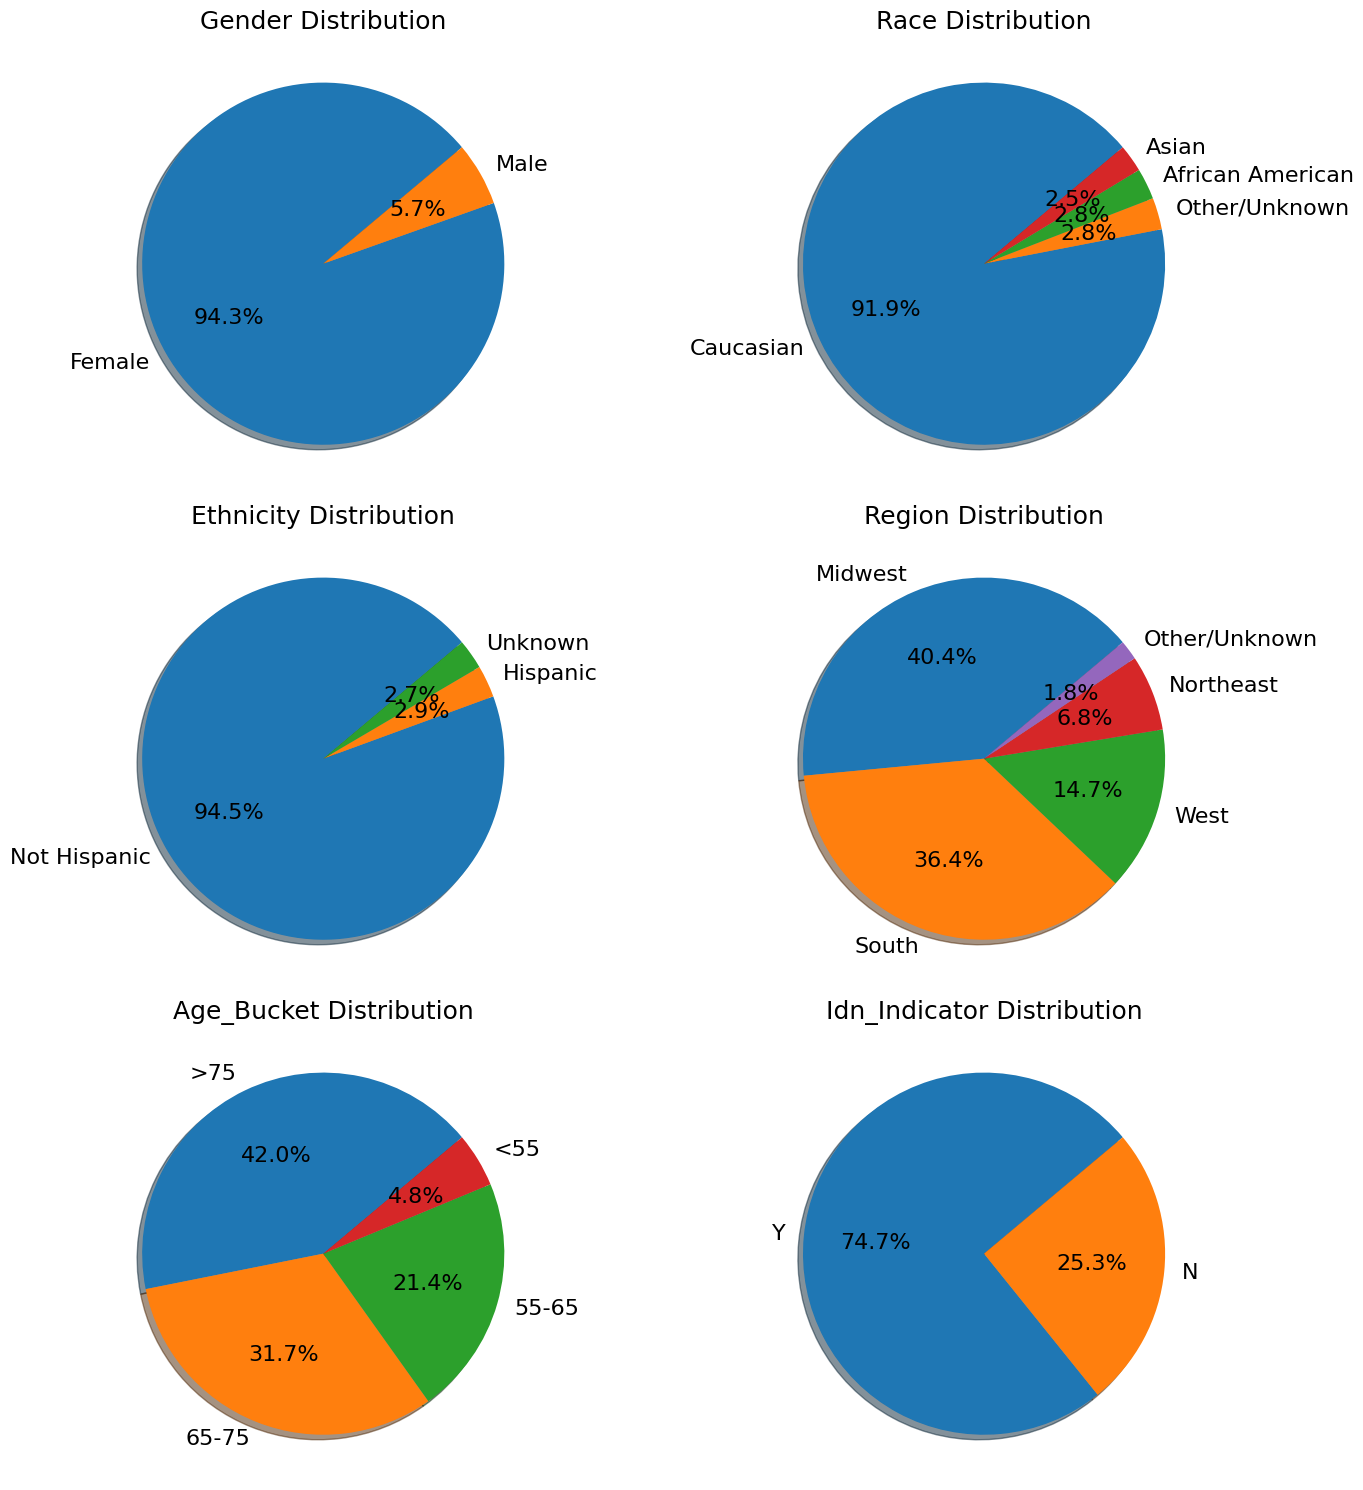

In [17]:
import matplotlib.pyplot as plt
# data visualization using pie charts

demographics_features = ['Gender', 'Race', 'Ethnicity', 'Region','Age_Bucket','Idn_Indicator']
index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1)}
fig, ax = plt.subplots(3,2, figsize=(15, 15), dpi=100)

for index, demographics_feature in enumerate(demographics_features):
  i,j = index_decoder[index]
  var = df[demographics_feature].value_counts()
  labels = var.index
  ax[i,j].pie(x = var, labels=labels, autopct='%1.1f%%',shadow=True, startangle=40, textprops={'fontsize': 16})
  ax[i,j].set_title(demographics_feature + ' Distribution', fontsize = 18)

fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Distribution of Numeric Values')

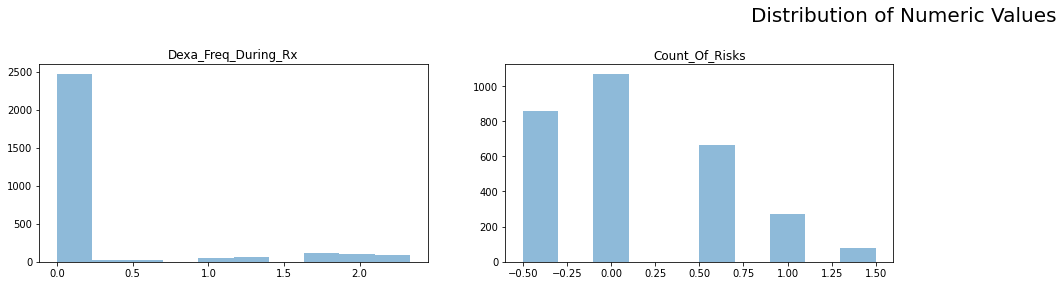

In [ ]:
fig = plt.figure(figsize=(32, 8))
for i in range(len(num_features)):

  f = list(num_features)[i]
  plt.subplot(2, 4, i+1)
  hst = plt.hist(df[f], alpha=0.5)
  plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)

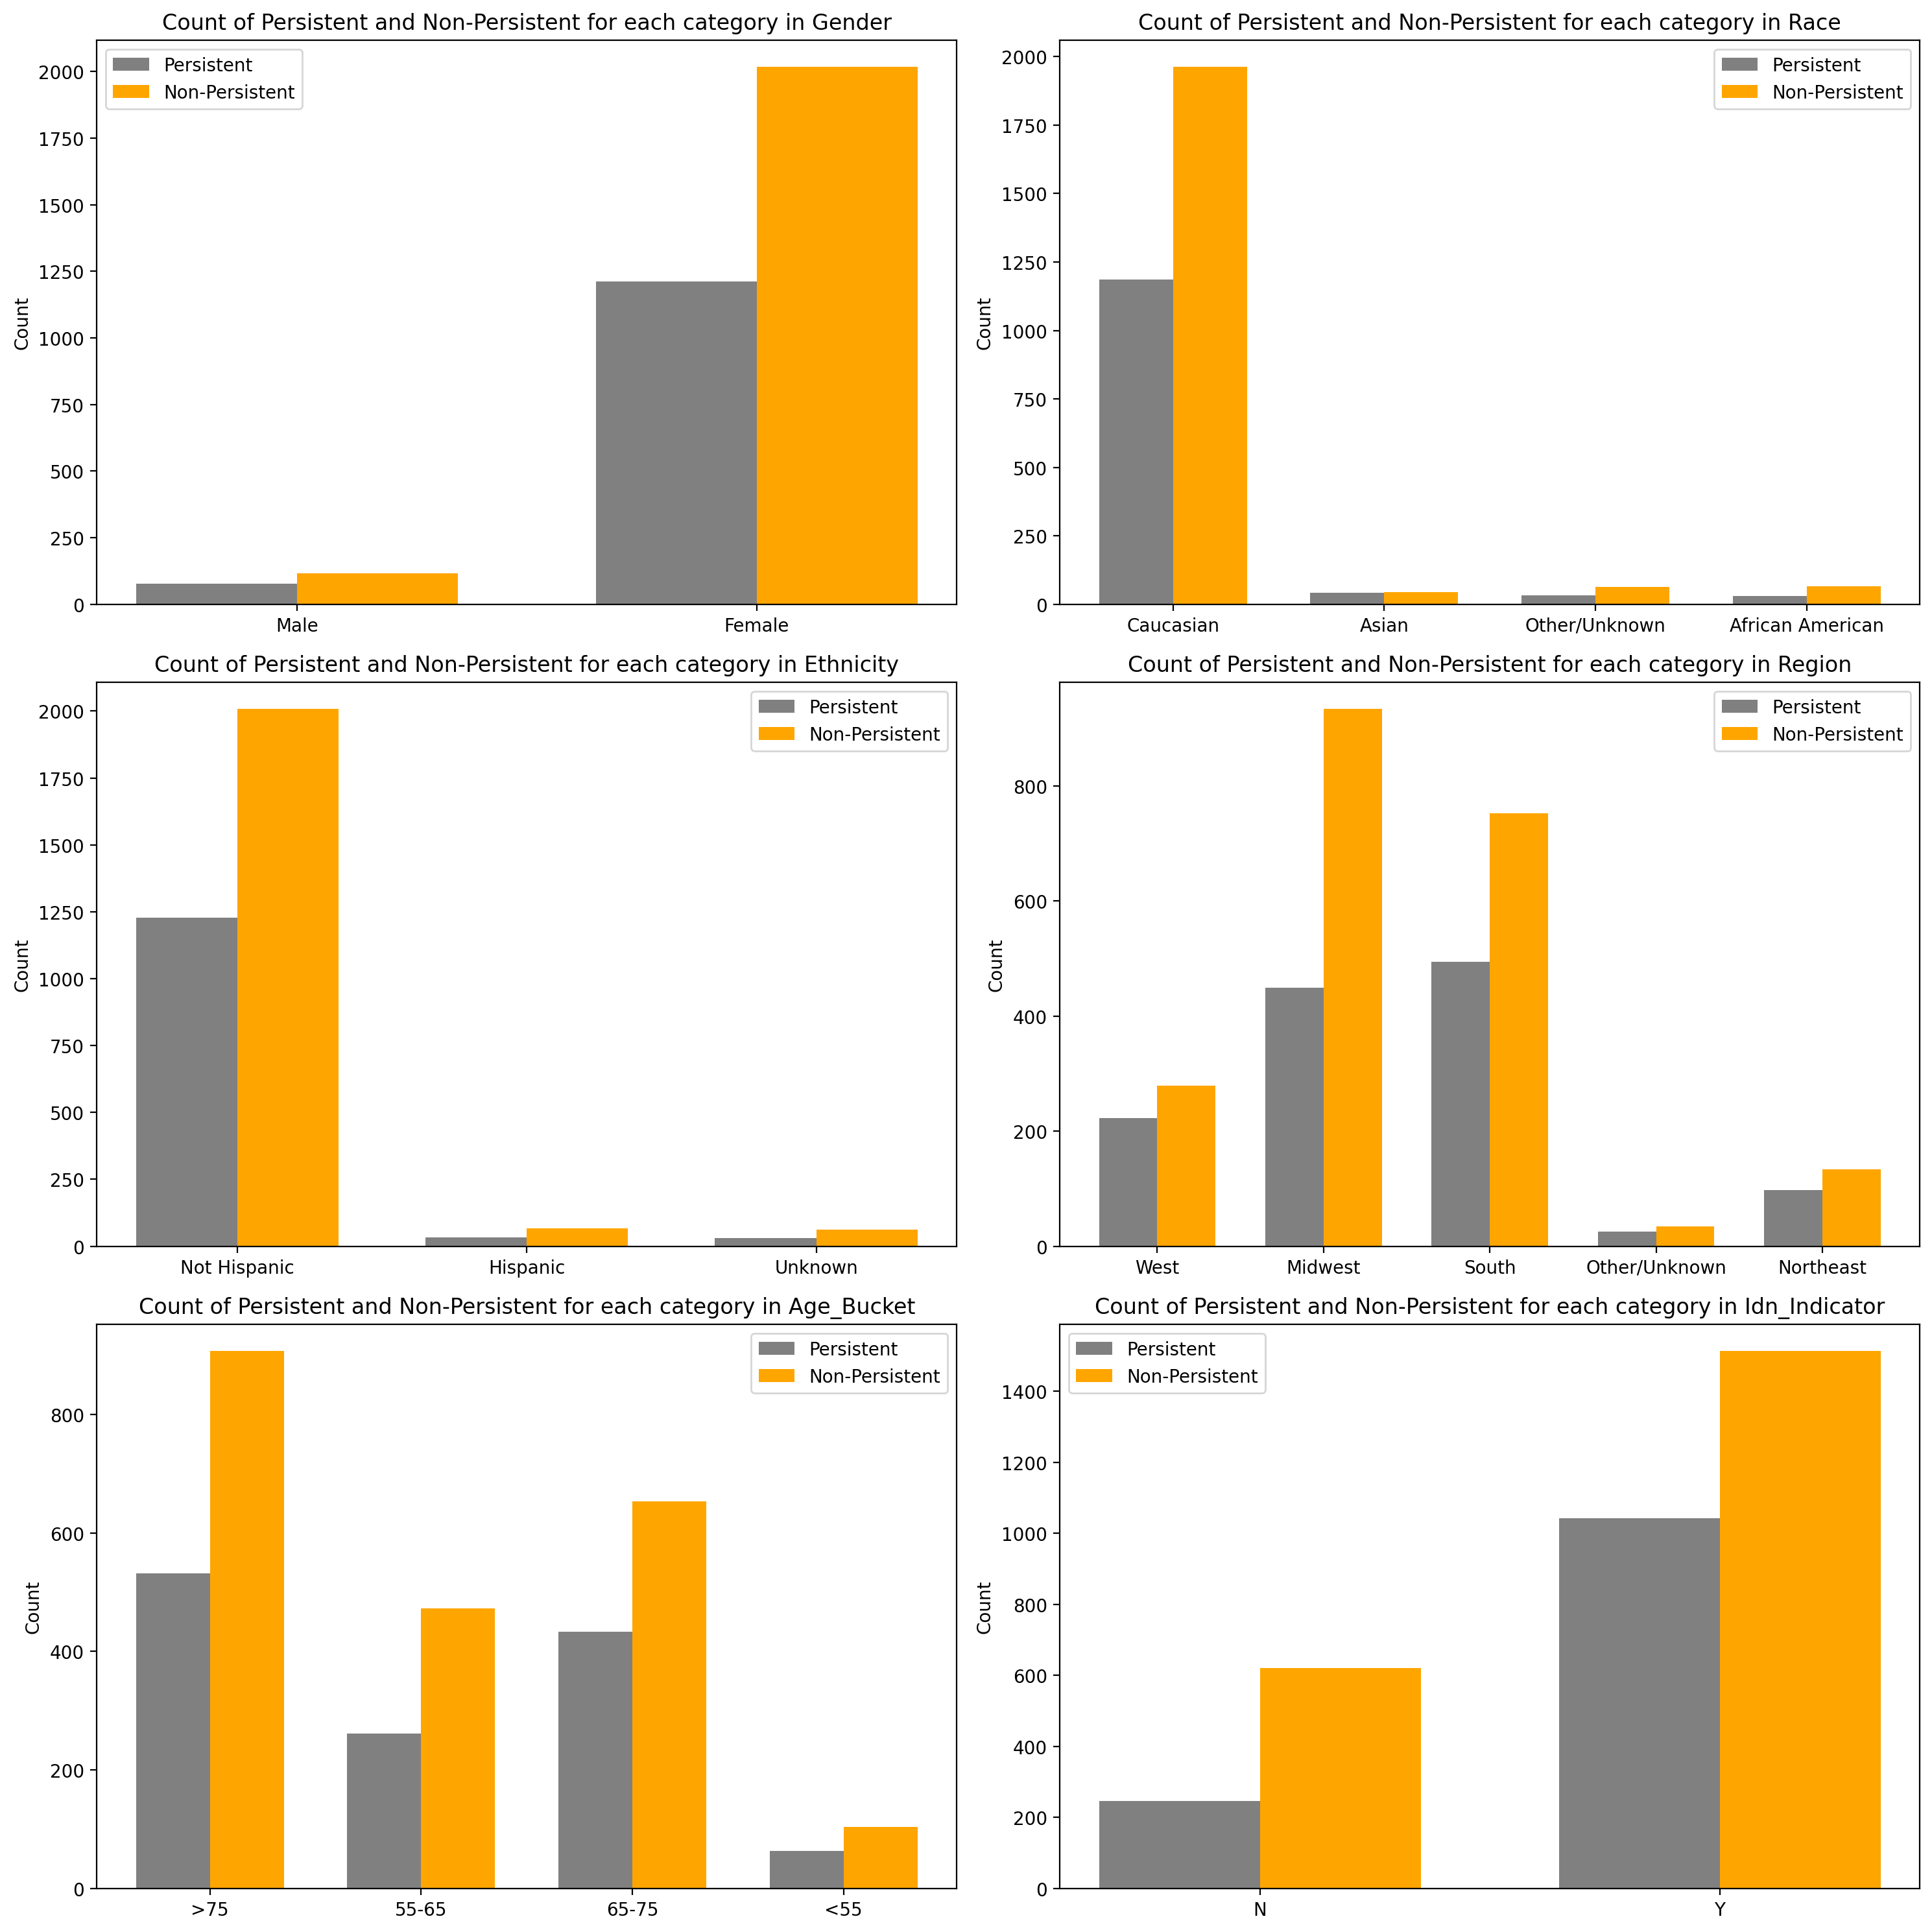

In [18]:
demographics_features = ['Gender', 'Race', 'Ethnicity', 'Region','Age_Bucket','Idn_Indicator']


index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1),}
fig, ax = plt.subplots(3,2, figsize=(15, 15), dpi=200)

for index, demographics_feature in enumerate(demographics_features):
    labels = df[demographics_feature].unique()
    x = np.arange(len(labels))
    p = []
    nonp = []
    width = 0.35 
    i, j = index_decoder[index]
    for l in labels:
        values = df[df[demographics_feature] == l]['Persistency_Flag'].value_counts(ascending=True)
        p.append(values['Persistent'])
        nonp.append(values['Non-Persistent'])
    rects1 = ax[i,j].bar(x - width/2, p, width, label='Persistent', color='gray')
    rects2 = ax[i,j].bar(x + width/2, nonp, width, label='Non-Persistent', color='orange')
    ax[i,j].set_ylabel('Count')
    ax[i,j].set_title('0')
    ax[i,j].set_title('Count of Persistent and Non-Persistent for each category in ' + demographics_feature)
    ax[i,j].set_xticks(x)
    ax[i,j].set_xticklabels(labels)
    ax[i,j].legend()

    fig.tight_layout()
plt.show()

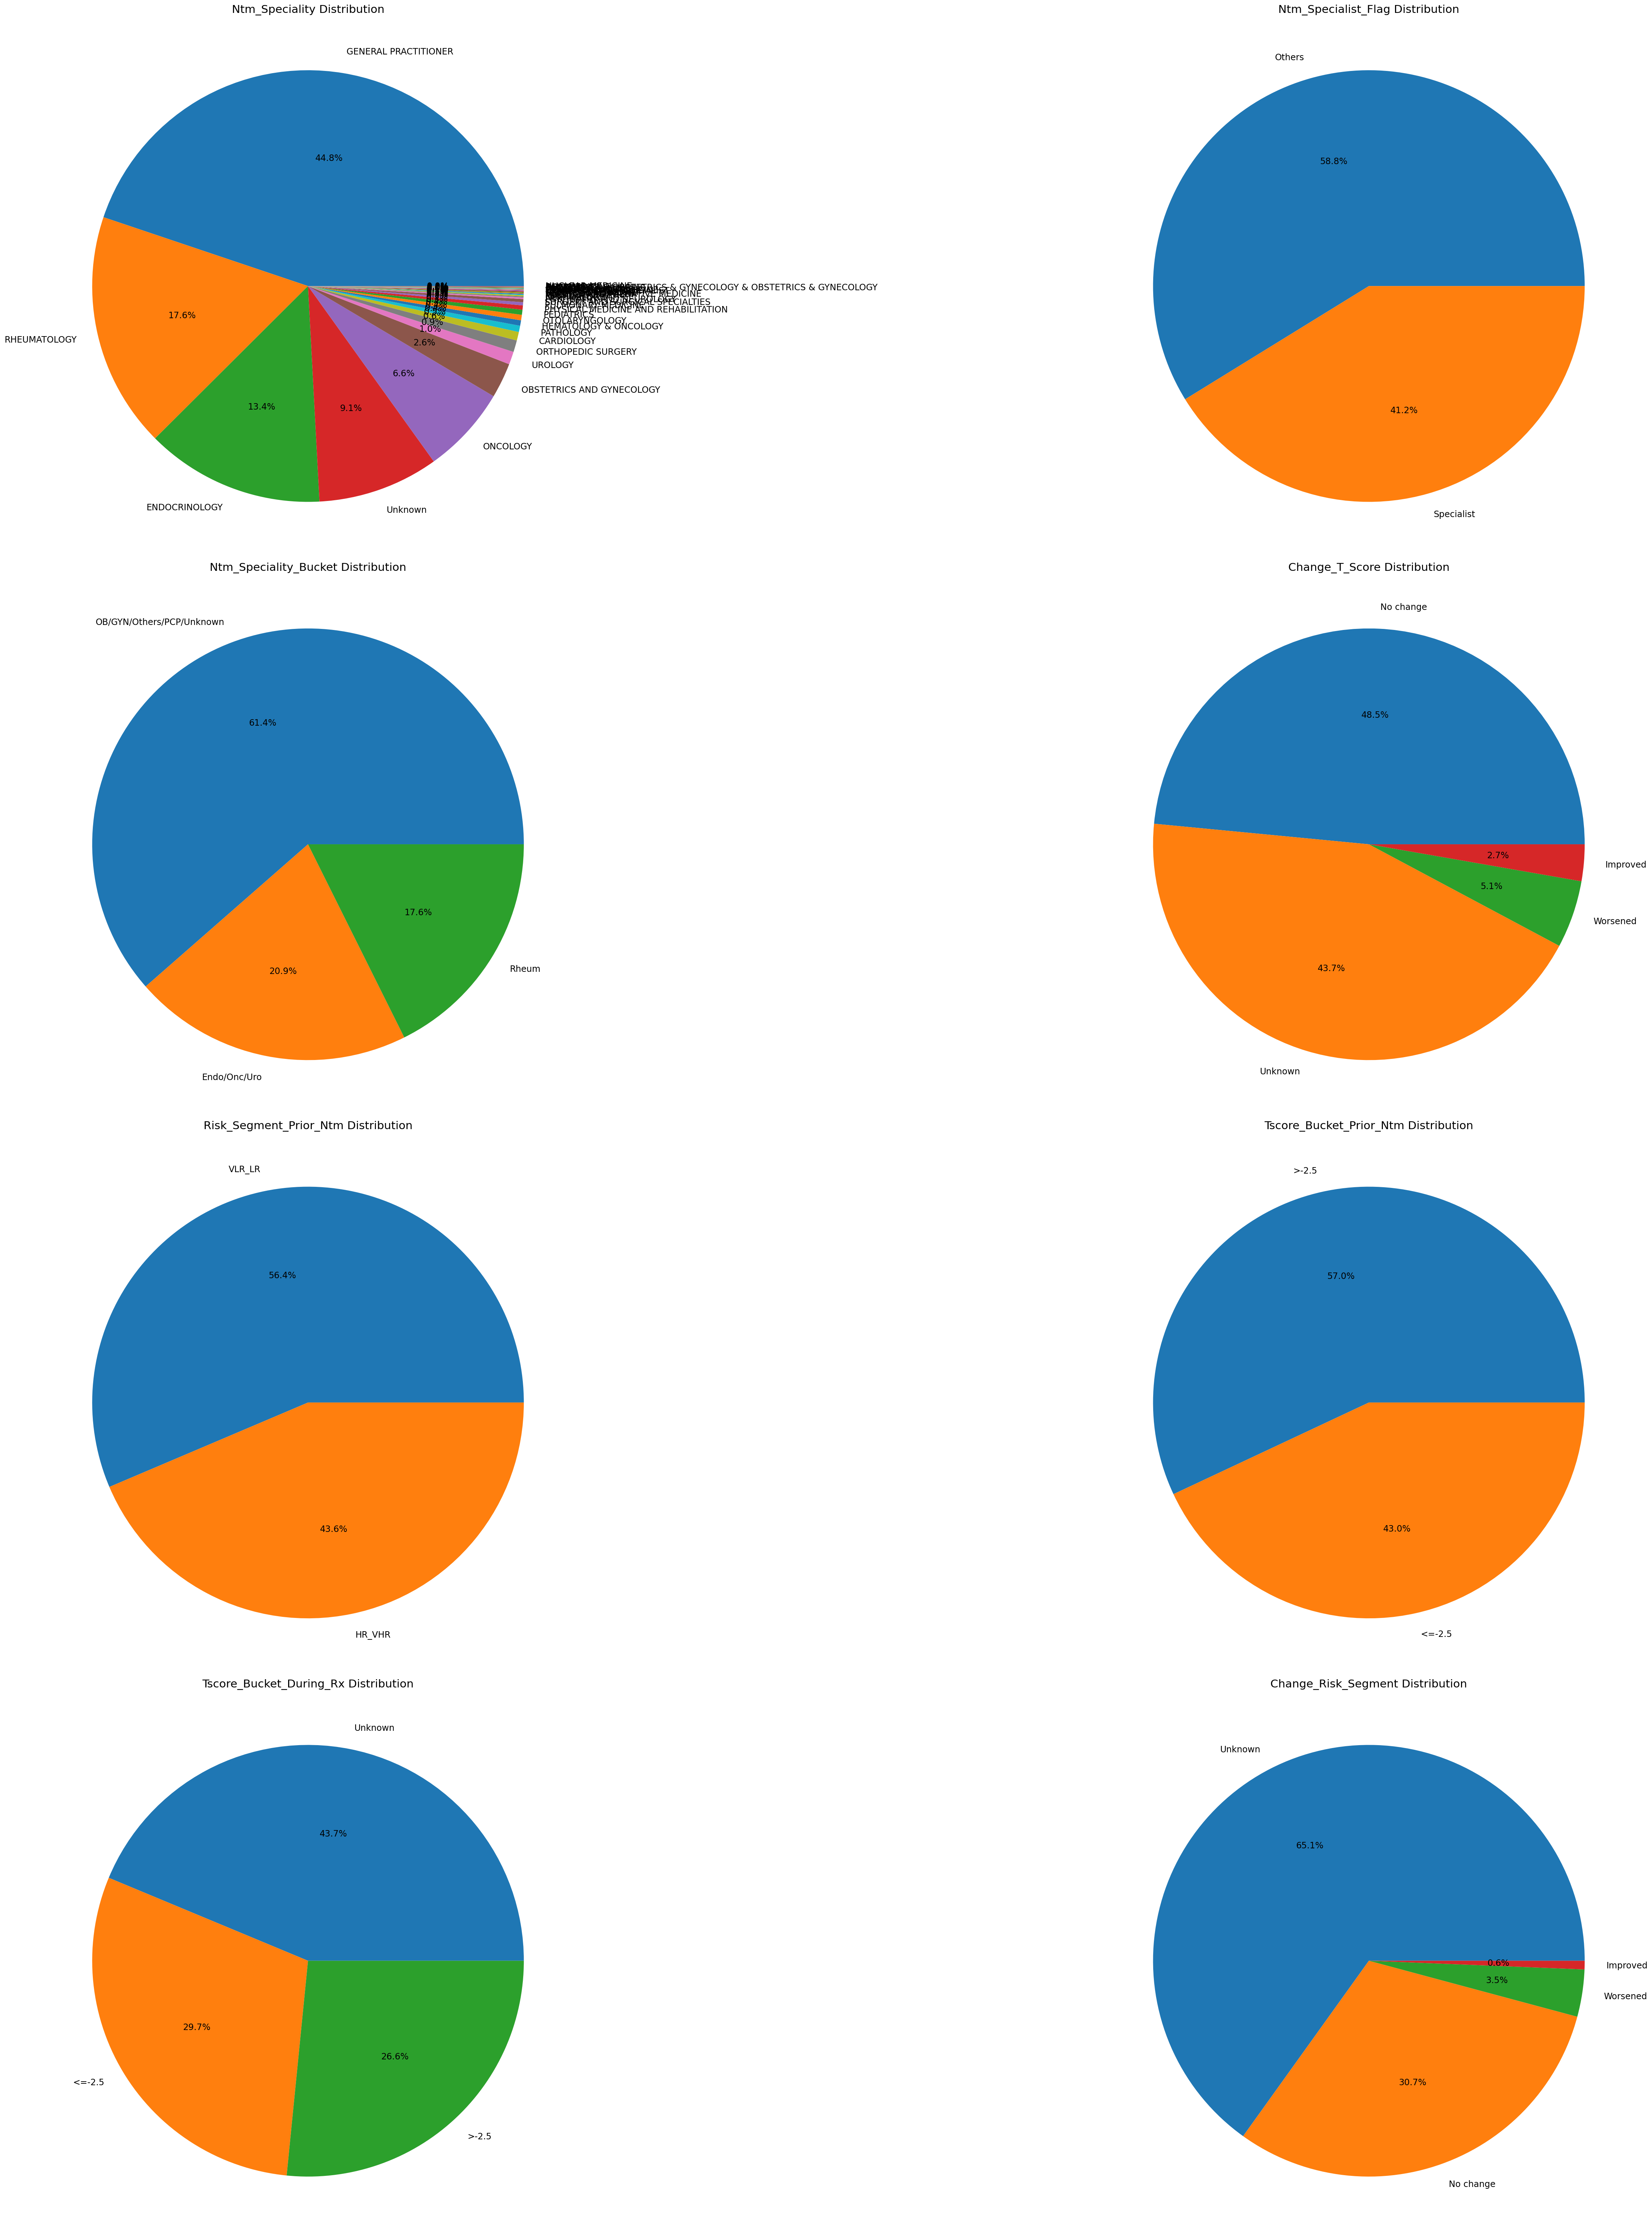

In [46]:
# data visualization using pie charts
provider_features = ['Ntm_Speciality', 'Ntm_Specialist_Flag','Ntm_Speciality_Bucket','Change_T_Score','Risk_Segment_Prior_Ntm',
                     'Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx','Change_Risk_Segment']

index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1),
                 6: (3,0), 7: (3,1), 8: (4,0)}
fig, ax = plt.subplots(4,2, figsize=(50, 50), dpi=125)

for index, provider_feature in enumerate(provider_features):
  i,j = index_decoder[index]
  var = df[provider_feature].value_counts()
  labels = var.index
  ax[i,j].pie(x = var, labels=labels, autopct='%1.1f%%',  textprops={'fontsize': 14})
  ax[i,j].set_title(provider_feature + ' Distribution', fontsize = 18)

fig.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

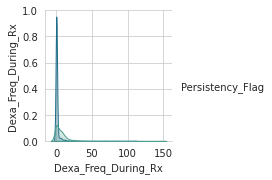

In [48]:
import seaborn as sbn
sbn.set_style("whitegrid")
plt.figure()
sbn.pairplot(df[['Persistency_Flag','Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Dexa_Freq_During_Rx', 'Ntm_Speciality', 
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx']], hue='Persistency_Flag', palette='crest')
plt.show()

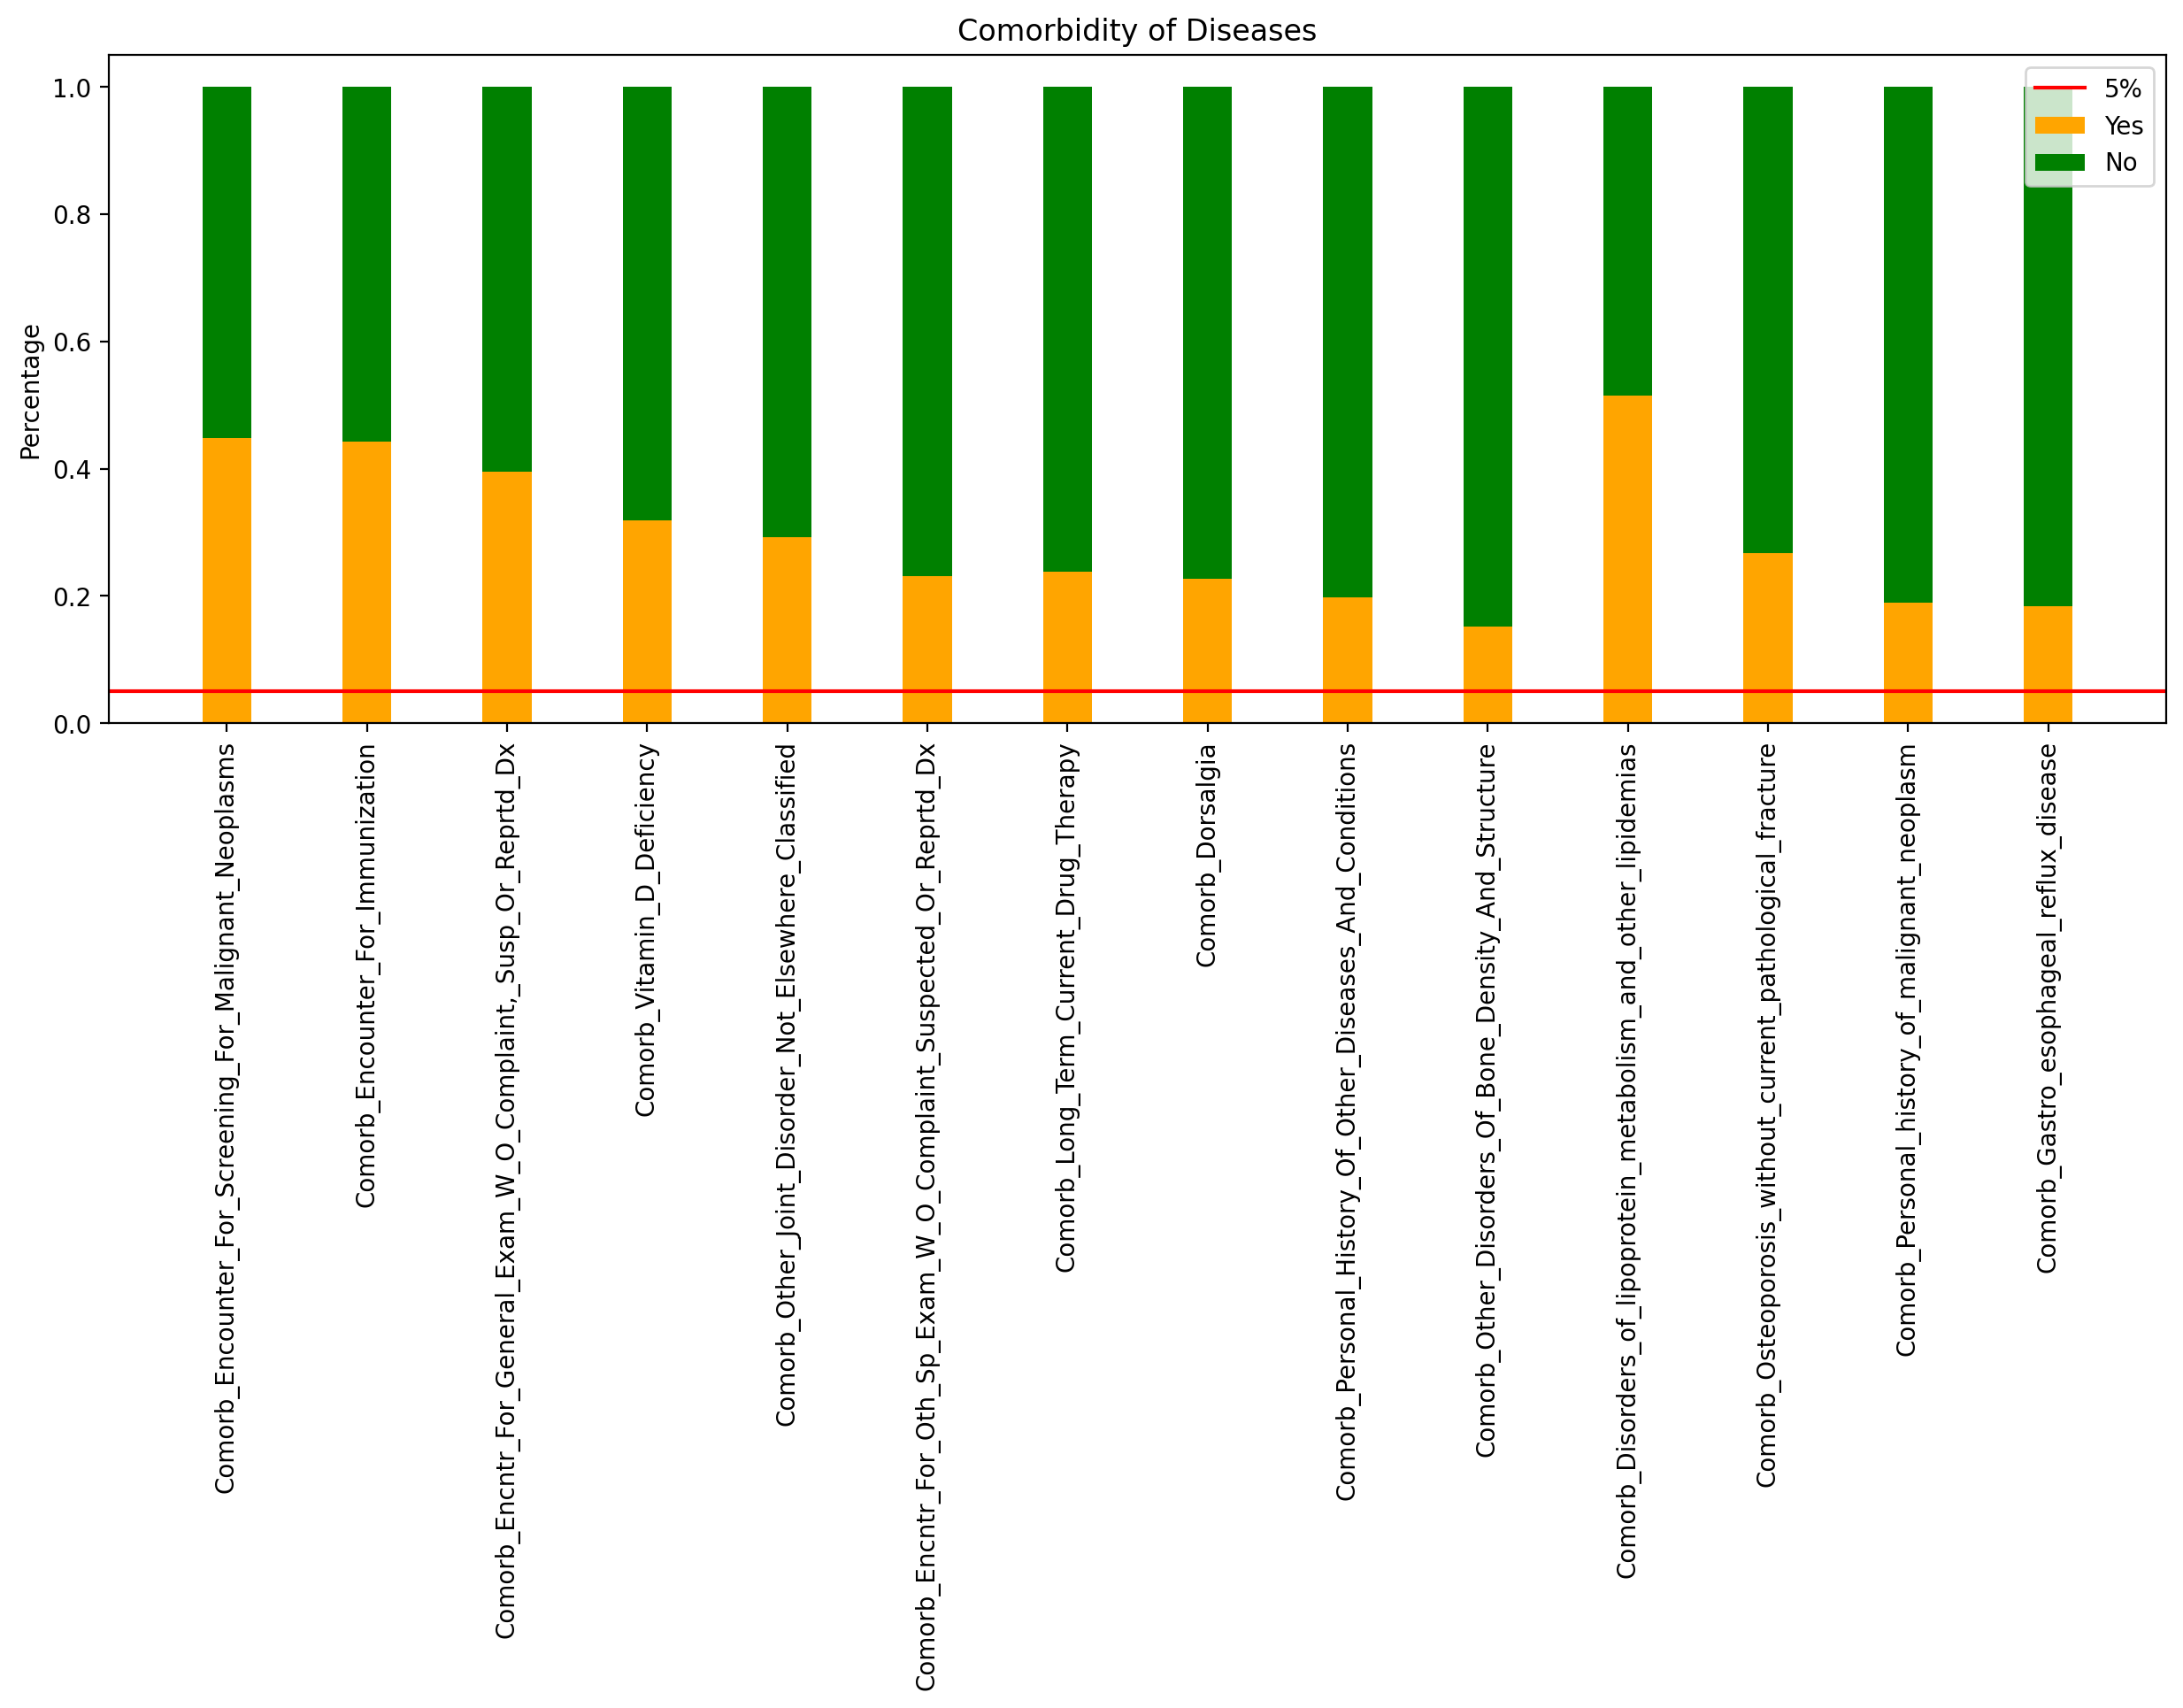

In [ ]:
labels = [c for c in df.columns if "Comorb" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    percantages = df[l].value_counts(ascending=True)/ len(df)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color="orange")
ax.bar(labels, no, width, bottom=yes, label='No', color="green")
ax.axhline(y=0.05, color='red', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Comorbidity of Diseases')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

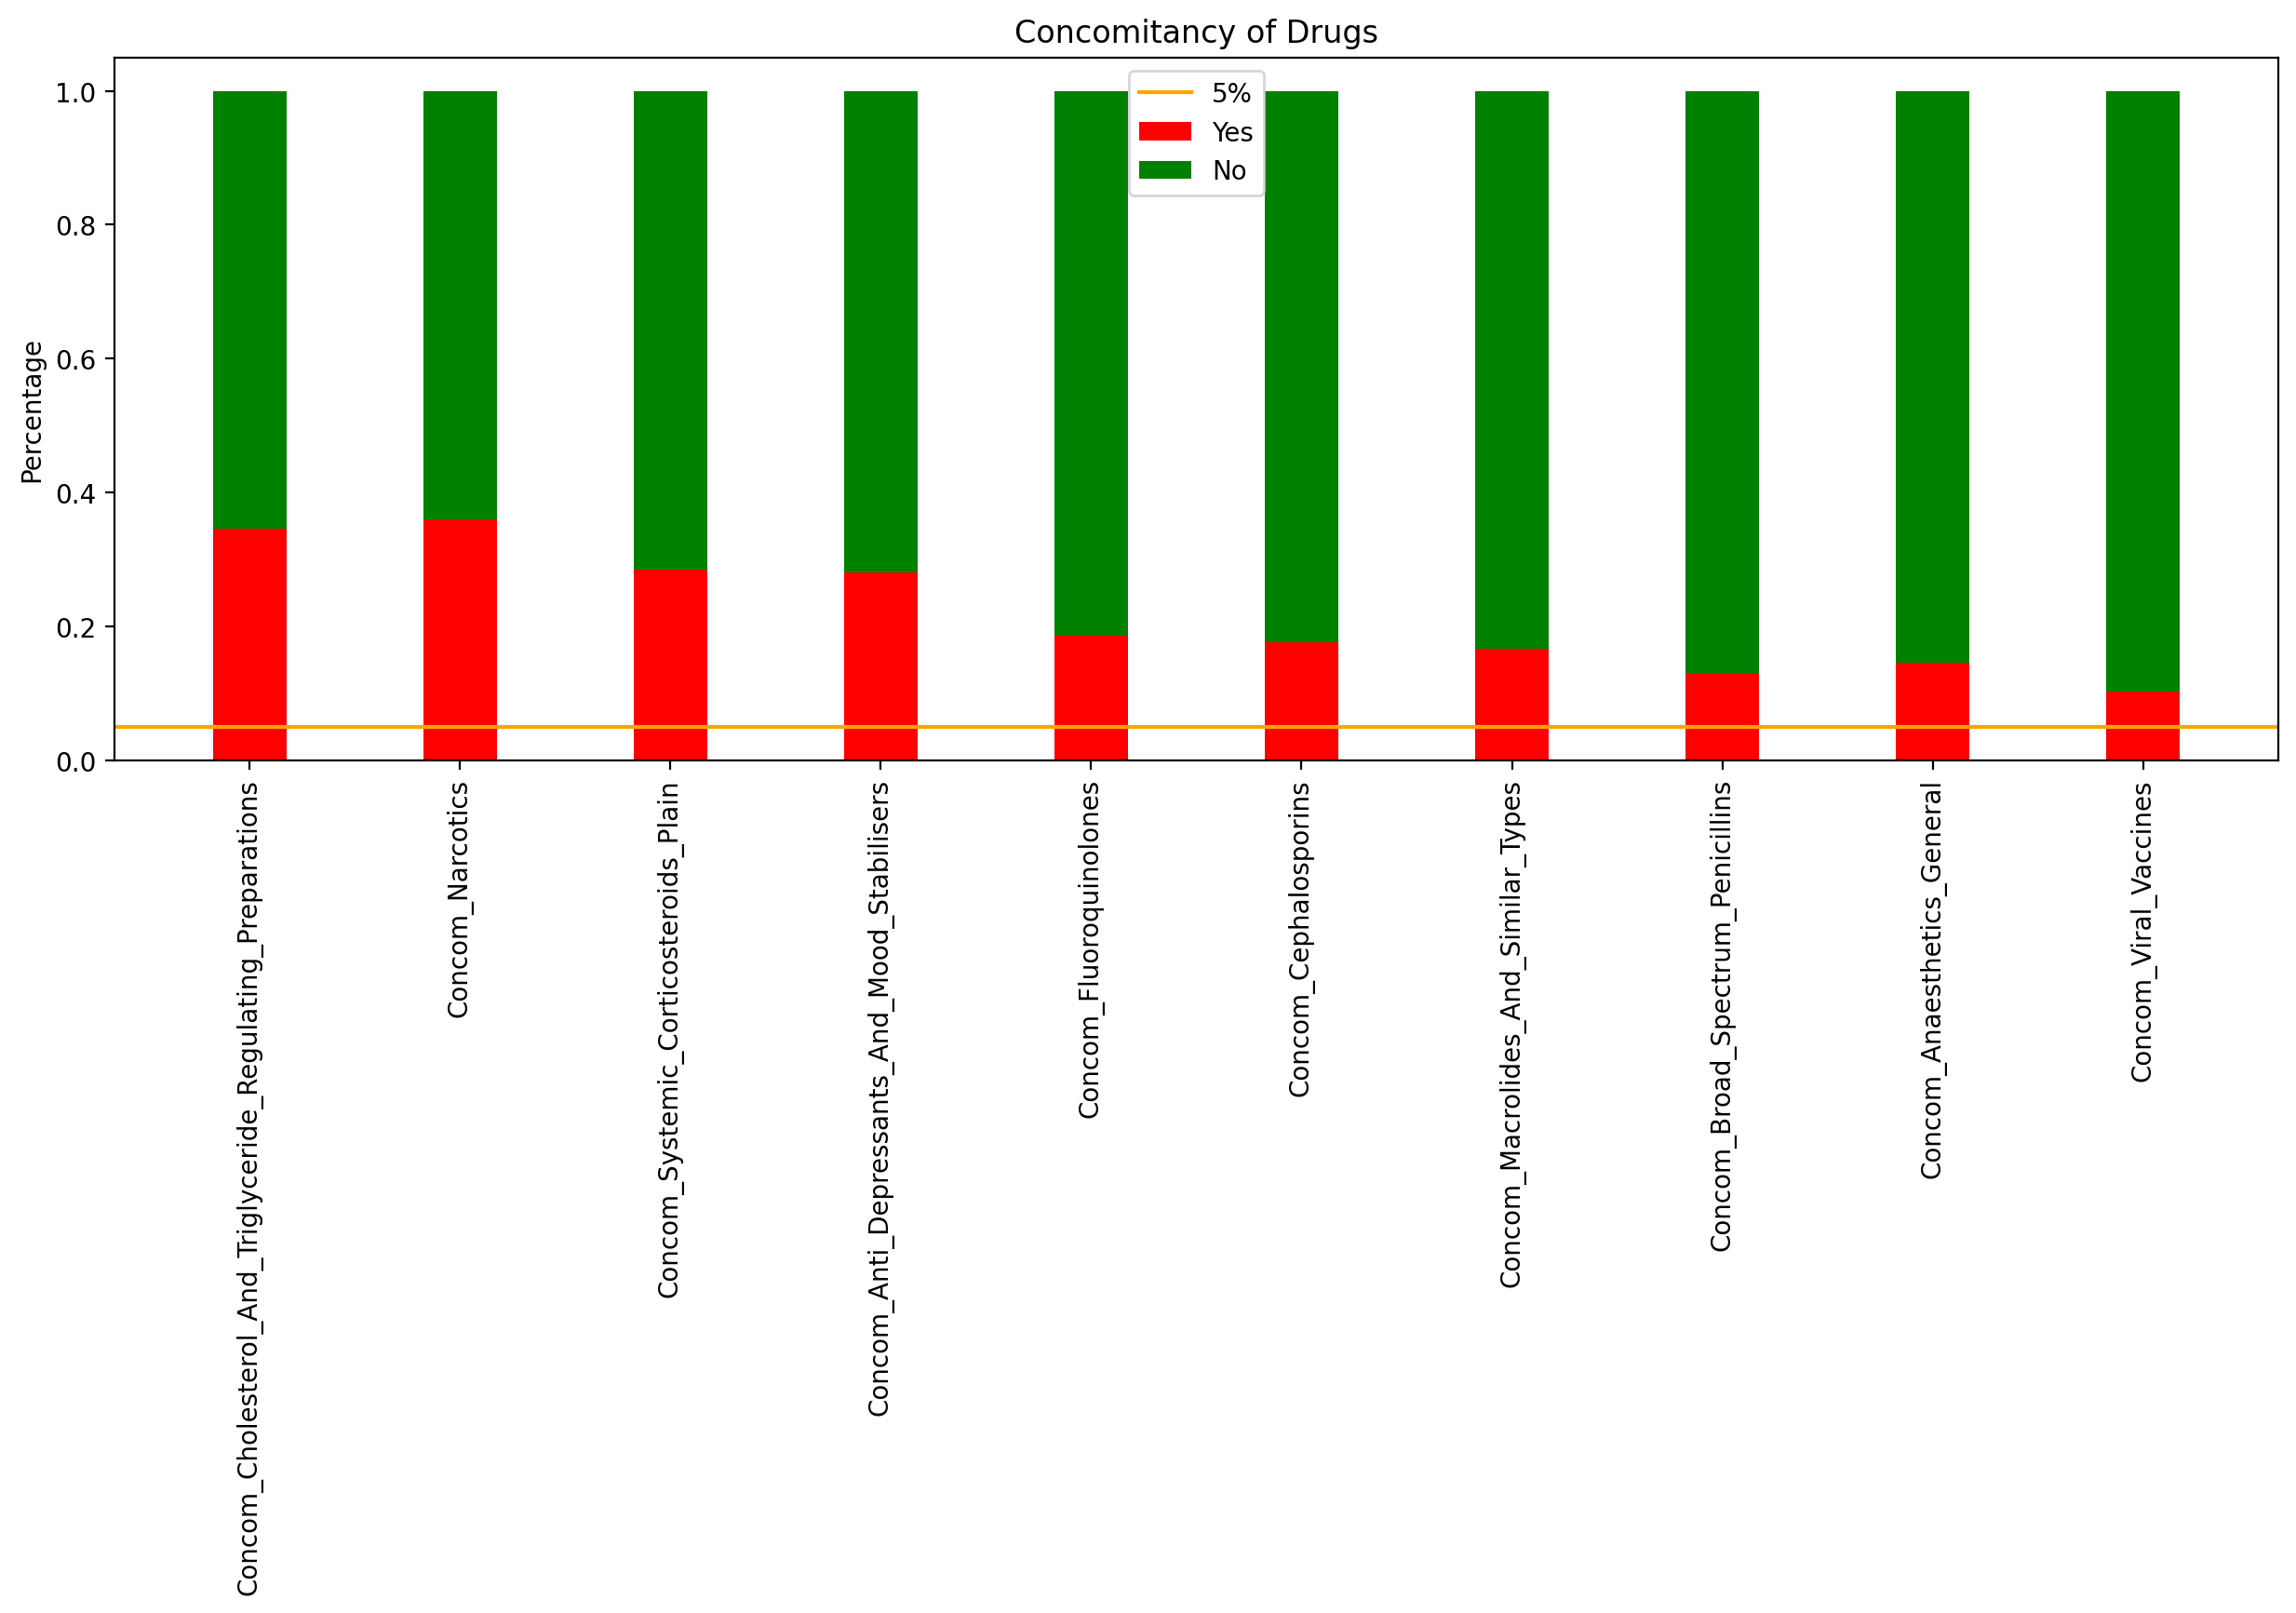

In [ ]:
labels = [c for c in df.columns if "Concom" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    percantages = df[l].value_counts(ascending=True)/ len(df)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='red')
ax.bar(labels, no, width, bottom=yes, label='No', color='green')
ax.axhline(y=0.05, color='orange', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Concomitancy of Drugs')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

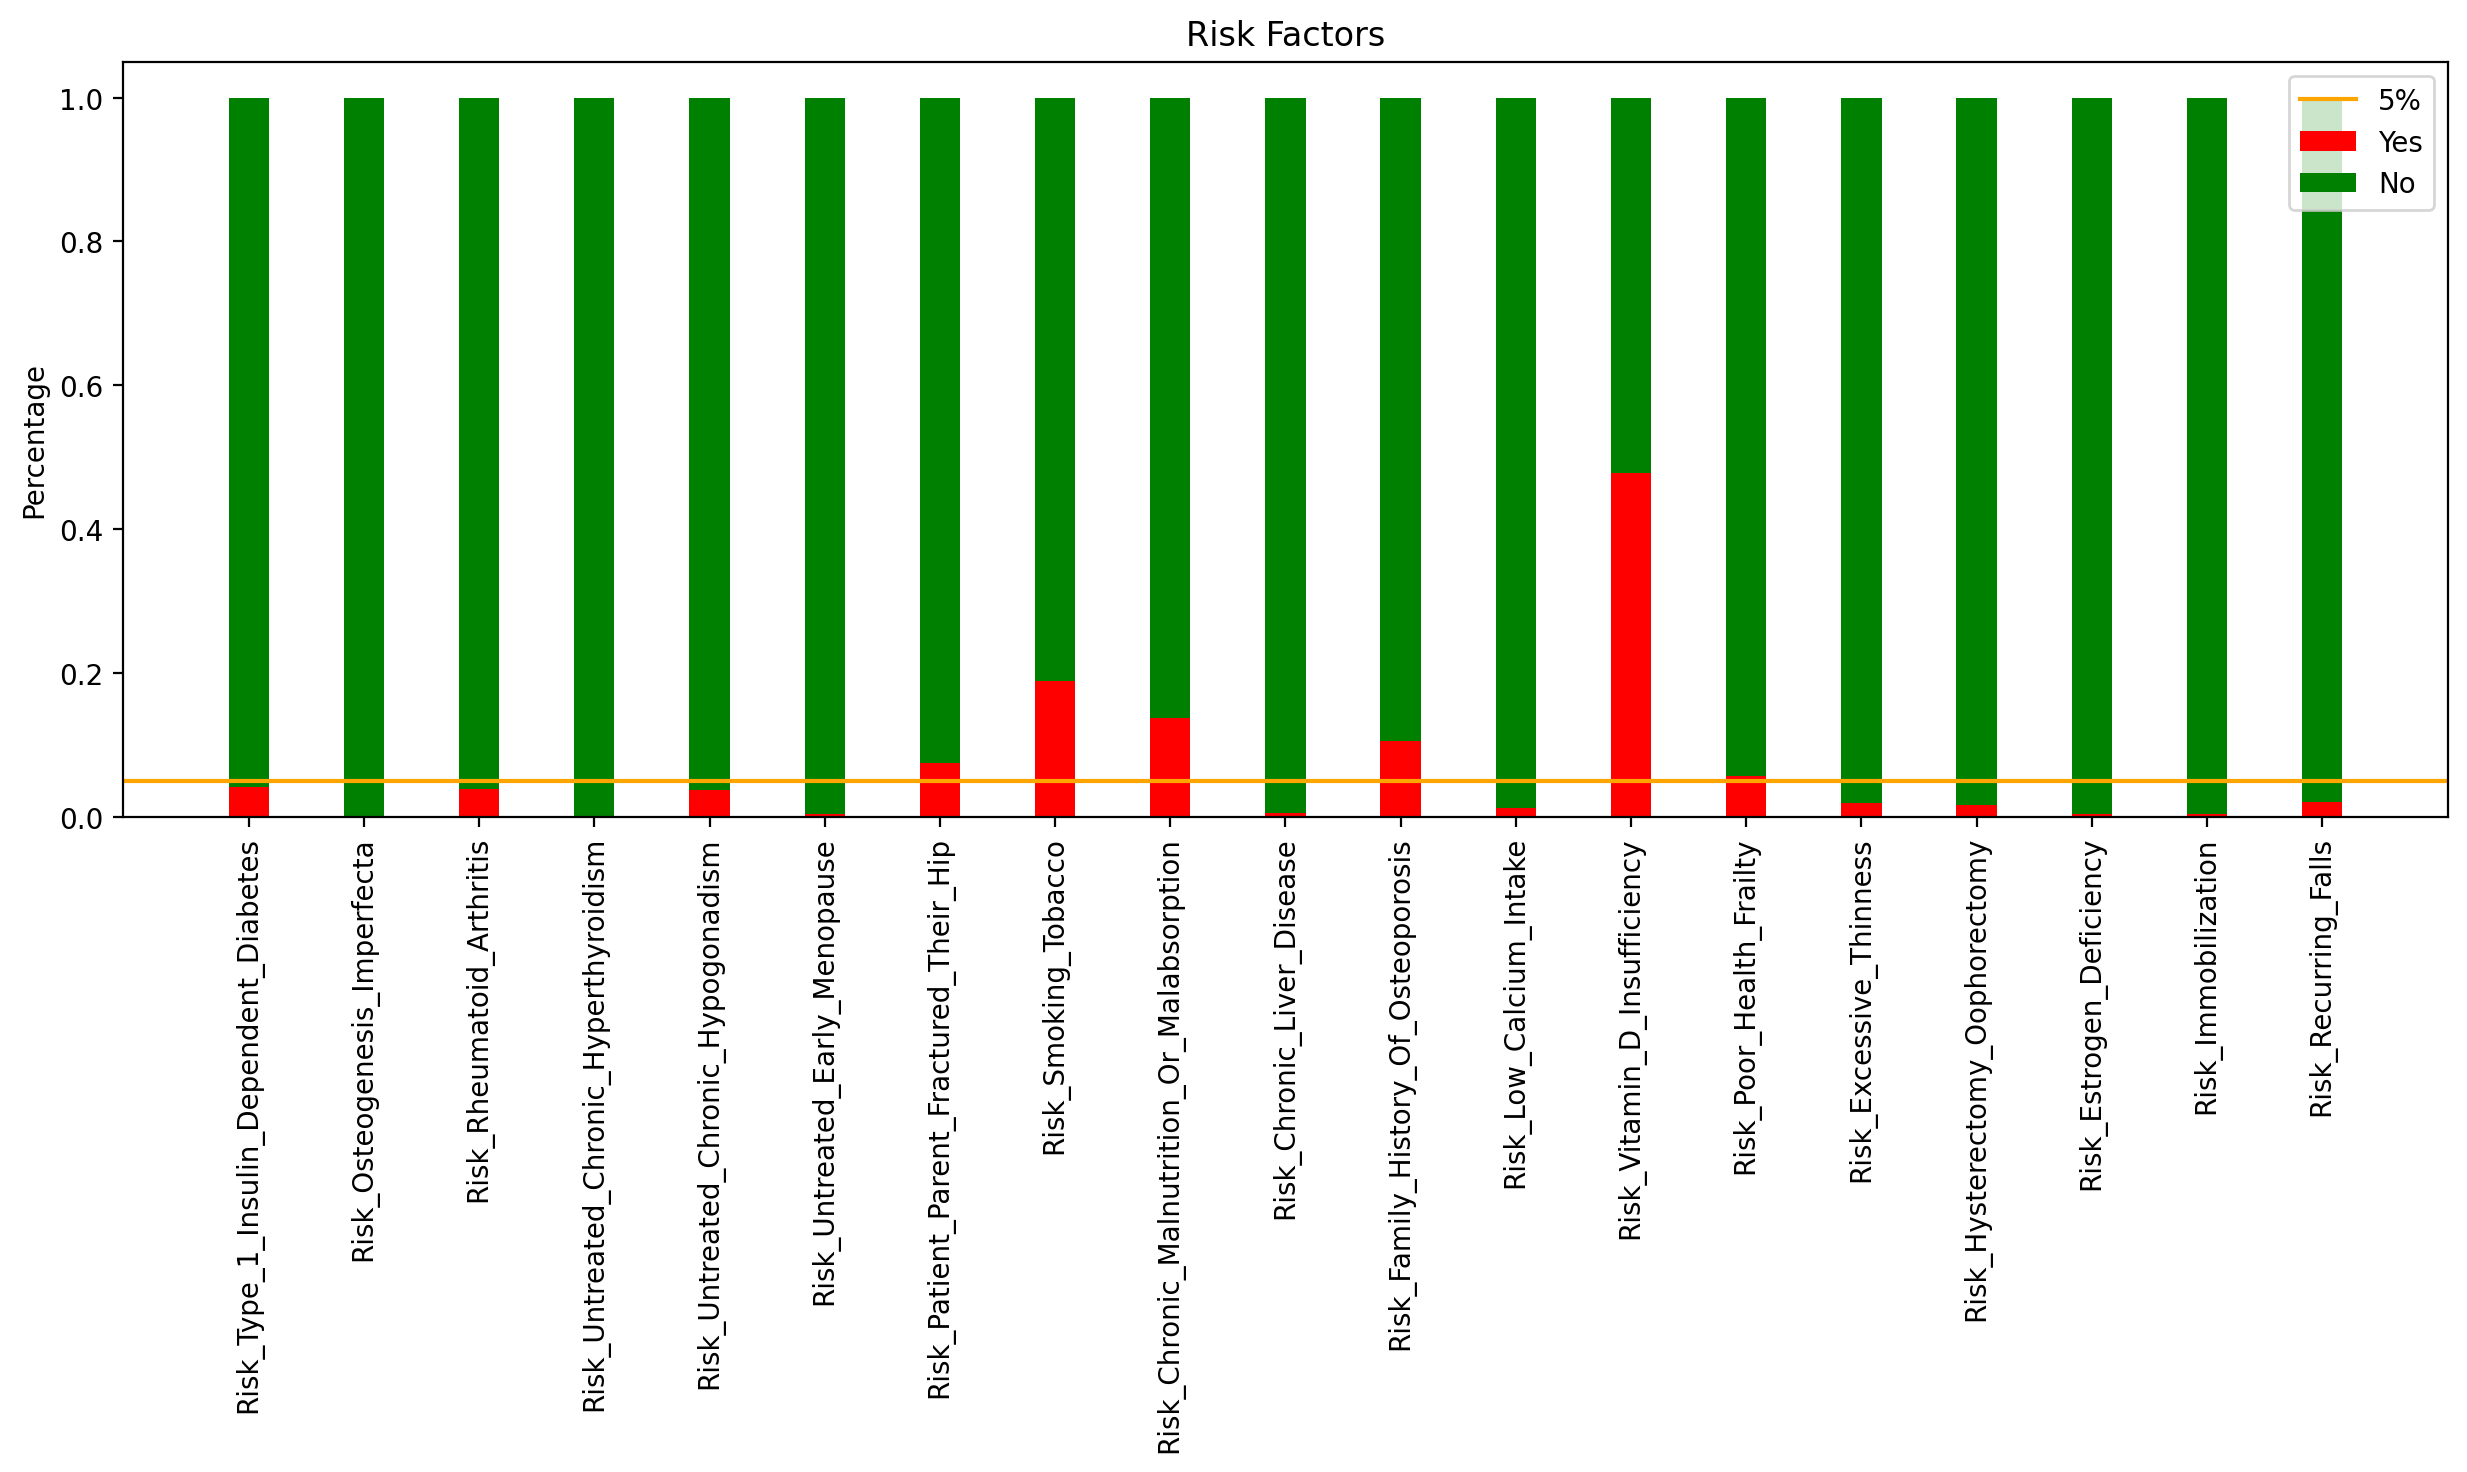

In [ ]:
labels = [c for c in df.iloc[:,49:68 ].columns if "Risk_" in c]

yes = []
no = []
width = 0.35 
for l in labels:
    percantages = df[l].value_counts(ascending=True)/ len(df)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='red')
ax.bar(labels, no, width, bottom=yes, label='No', color='green')
ax.axhline(y=0.05, color='orange', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Risk Factors')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

In [ ]:
for f in cat_features:
    tab = df[f].value_counts()
    print('%s:\t%s' % (f, ', '.join([ ("%s(%d)" %(tab.index[i], tab.values[i])) for i in range(len(tab))]) ))

Risk_Chronic_Malnutrition_Or_Malabsorption:	N(2954), Y(470)
Idn_Indicator:	Y(2557), N(867)
Comorb_Osteoporosis_without_current_pathological_fracture:	N(2507), Y(917)
Ntm_Speciality:	GENERAL PRACTITIONER(1535), RHEUMATOLOGY(604), ENDOCRINOLOGY(458), Unknown(310), ONCOLOGY(225), OBSTETRICS AND GYNECOLOGY(90), UROLOGY(33), ORTHOPEDIC SURGERY(30), CARDIOLOGY(22), PATHOLOGY(16), HEMATOLOGY & ONCOLOGY(14), OTOLARYNGOLOGY(14), PEDIATRICS(13), PHYSICAL MEDICINE AND REHABILITATION(11), PULMONARY MEDICINE(8), SURGERY AND SURGICAL SPECIALTIES(8), PSYCHIATRY AND NEUROLOGY(4), NEPHROLOGY(3), ORTHOPEDICS(3), PLASTIC SURGERY(2), VASCULAR SURGERY(2), HOSPICE AND PALLIATIVE MEDICINE(2), GERIATRIC MEDICINE(2), GASTROENTEROLOGY(2), TRANSPLANT SURGERY(2), CLINICAL NURSE SPECIALIST(1), OCCUPATIONAL MEDICINE(1), HOSPITAL MEDICINE(1), OPHTHALMOLOGY(1), PODIATRY(1), EMERGENCY MEDICINE(1), RADIOLOGY(1), OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY(1), NEUROLOGY(1), PAIN MEDICINE(1), NUCLEAR M

In [ ]:
mat = pd.DataFrame(
    [ df[f].value_counts() for f in list(cat_features) ],
    index=list(cat_features)
    ).stack()

pd.DataFrame(mat.values, index=mat.index)

0
Risk_Chronic_Malnutrition_Or_Malabsorption         N           2954.0
                                                   Y            470.0
Idn_Indicator                                      N            867.0
                                                   Y           2557.0
Comorb_Osteoporosis_without_current_pathologica... N           2507.0
...                                                               ...
Frag_Frac_Prior_Ntm                                Y            552.0
Risk_Osteogenesis_Imperfecta                       N           3421.0
                                                   Y              3.0
Ntm_Specialist_Flag                                Others      2013.0
                                                   Specialist  1411.0

[3605 rows x 1 columns]

In [ ]:
level_substitution = {}

def levels2index(levels):
    dct = {}
    for i in range(len(levels)):
        dct[levels[i]] = i
    return dct

df_num = df.copy()

for c in cat_features:
    level_substitution[c] = levels2index(df[c].unique())
    df_num[c].replace(level_substitution[c], inplace=True)


df_num

Ptid  Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0        0                 0       0     0          0       0           0   
1        1                 1       0     1          0       0           1   
2        2                 1       1     2          1       1           2   
3        3                 1       1     0          0       1           0   
4        4                 1       1     0          0       1           0   
...    ...               ...     ...   ...        ...     ...         ...   
3419  3419                 0       1     0          0       2           0   
3420  3420                 0       1     0          0       2           0   
3421  3421                 0       1     0          0       2           0   
3422  3422                 1       1     0          0       2           1   
3423  3423                 1       1     0          0       2           2   

      Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  ...  \
0                  0                    0                      0  ...   
1                  0                    0                      0  ...   
2                  0                    0                      0  ...   
3                  0                    0                      0  ...   
4                  0                    0                      0  ...   
...              ...                  ...                    ...  ...   
3419               0                    0                      0  ...   
3420               1                    0                      0  ...   
3421               2                    1                      1  ...   
3422               1                    0                      0  ...   
3423               1                    0                      0  ...   

      Risk_Family_History_Of_Osteoporosis  Risk_Low_Calcium_Intake  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   
3                                       0                        0   
4                                       0                        0   
...                                   ...                      ...   
3419                                    0                        0   
3420                                    0                        0   
3421                                    0                        0   
3422                                    0                        0   
3423                                    0                        0   

      Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
3419                             1                         0   
3420                             0                         0   
3421                             1                         0   
3422                             0                         0   
3423                             1                         0   

      Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
3419                        0                               0   
3420                        0                               0   
3421     

In [ ]:
level_substitution

{'Adherent_Flag': {'Adherent': 0, 'Non-Adherent': 1},
 'Age_Bucket': {'55-65': 1, '65-75': 2, '<55': 3, '>75': 0},
 'Change_Risk_Segment': {'Improved': 3,
  'No change': 1,
  'Unknown': 0,
  'Worsened': 2},
 'Change_T_Score': {'Improved': 3,
  'No change': 0,
  'Unknown': 1,
  'Worsened': 2},
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias': {'N': 0,
  'Y': 1},
 'Comorb_Dorsalgia': {'N': 1, 'Y': 0},
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx': {'N': 1,
  'Y': 0},
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx': {'N': 1,
  'Y': 0},
 'Comorb_Encounter_For_Immunization': {'N': 1, 'Y': 0},
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms': {'N': 0, 'Y': 1},
 'Comorb_Gastro_esophageal_reflux_disease': {'N': 0, 'Y': 1},
 'Comorb_Long_Term_Current_Drug_Therapy': {'N': 0, 'Y': 1},
 'Comorb_Osteoporosis_without_current_pathological_fracture': {'N': 0, 'Y': 1},
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure': {'N': 0,

In [ ]:
fig = px.histogram(df, x="Dexa_Freq_During_Rx",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

In [ ]:
fig = px.histogram(df, x="Count_Of_Risks",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

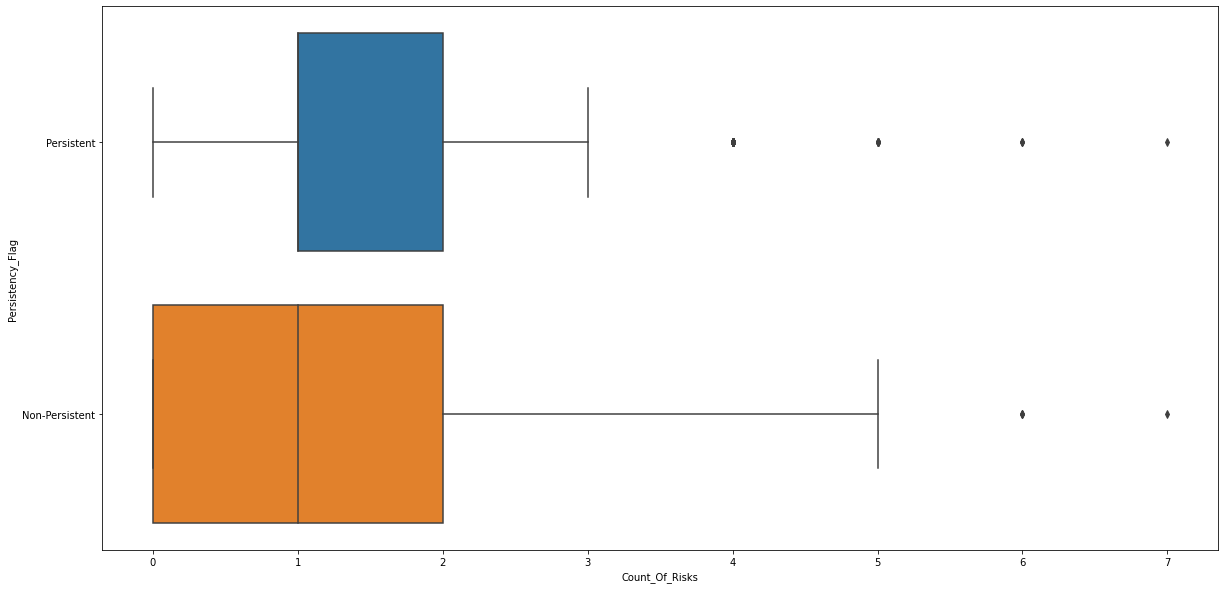

In [ ]:
import seaborn as sbn
plt.figure(figsize=(20,10))
var ="Count_Of_Risks"
sbn.boxplot(x=var,y ="Persistency_Flag",data=df)

In [ ]:
print("Count of risks skewness: ",df["Count_Of_Risks"].skew())
print("Count of risks Kurtosis: ",df["Count_Of_Risks"].kurt())



Count of risks skewness:  0.8797905232898707
Count of risks Kurtosis:  0.9004859968892842


In [ ]:
print("dexa_freq_during_rx skewness: ",df["Dexa_Freq_During_Rx"].skew())
print("dexa_freq_during_rx Kurtosis: ",df["Dexa_Freq_During_Rx"].kurt())

dexa_freq_during_rx skewness:  6.8087302112992285
dexa_freq_during_rx Kurtosis:  74.75837754795428


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
dexa_scaled = StandardScaler().fit_transform(df['Dexa_Freq_During_Rx'][:,np.newaxis])
low_range = dexa_scaled[dexa_scaled[:,0].argsort()][:10]
high_range= dexa_scaled[dexa_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]]

outer range (high) of the distribution:
[[ 7.98784109]
 [ 8.11076133]
 [ 8.47952205]
 [ 9.58580421]
 [10.44624589]
 [10.44624589]
 [12.90465068]
 [13.15049116]
 [14.13385307]
 [17.57561978]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
scaler = RobustScaler()
df['Dexa_Freq_During_Rx'] = scaler.fit_transform(df['Dexa_Freq_During_Rx'].values.reshape(-1,1))

In [ ]:
scaler = RobustScaler()
df['Count_Of_Risks'] = scaler.fit_transform(df['Count_Of_Risks'].values.reshape(-1,1))

In [ ]:

Q1 = np.percentile(df['Dexa_Freq_During_Rx'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Dexa_Freq_During_Rx'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
upper = np.where(df['Dexa_Freq_During_Rx'] >= (Q3+1.5*IQR))
lower = np.where(df['Dexa_Freq_During_Rx'] <= (Q1-1.5*IQR))

print("lower",lower[0])
print("Upper",upper[0])

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

Old Shape:  (3424, 69)
lower []
Upper [  32   33   62   65   89  101  110  116  164  180  186  194  198  201
  217  241  246  256  264  282  292  303  327  340  349  358  368  369
  373  378  382  390  415  417  426  433  448  457  462  464  480  495
  496  497  505  514  517  541  545  549  563  575  588  589  592  599
  603  605  613  640  646  651  653  656  657  678  684  688  700  705
  710  711  726  728  729  730  759  760  764  765  785  786  804  814
  823  834  847  849  864  870  873  885  909  915  925  926  930  937
  946  978  982  991  994 1006 1008 1016 1042 1061 1073 1074 1076 1113
 1118 1119 1128 1134 1141 1148 1151 1196 1240 1265 1267 1270 1272 1273
 1280 1283 1286 1291 1315 1359 1360 1363 1365 1370 1372 1396 1398 1404
 1448 1474 1513 1524 1533 1539 1546 1550 1554 1555 1564 1566 1570 1576
 1599 1628 1641 1642 1647 1654 1662 1671 1691 1703 1724 1732 1734 1746
 1752 1773 1782 1783 1788 1793 1803 1815 1826 1833 1834 1836 1838 1848
 1852 1854 1870 1876 1895 1901 1904 190

In [ ]:

Q1 = np.percentile(df['Count_Of_Risks'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Count_Of_Risks'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
upper = np.where(df['Count_Of_Risks'] >= (Q3+1.5*IQR))
lower = np.where(df['Count_Of_Risks'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape) 

df = df.reset_index(drop=True)

Old Shape:  (2964, 69)
lower []
Upper [ 281  318  327  507  655  665  678  705  733  952 1001 1126 1590 1624
 1836 2227 2234 2450 2611 2702 2755 2888]
New Shape:  (2942, 69)


In [ ]:
df.describe(include=['O'])

Ptid Persistency_Flag  Gender       Race     Ethnicity   Region  \
count   2942             2942    2942       2942          2942     2942   
unique  2942                2       2          4             3        5   
top       P1   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq       1             2047    2769       2701          2784     1210   

       Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
count        2942                  2942                2942   
unique          4                    35                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1262                  1345                1774   

            Ntm_Speciality_Bucket  ... Risk_Chronic_Liver_Disease  \
count                        2942  ...                       2942   
unique                          3  ...                          2   
top     OB/GYN/Others/PCP/Unknown  ...                          N   
freq                         1855  ...                       2928   

       Risk_Family_History_Of_Osteoporosis Risk_Low_Calcium_Intake  \
count                                 2942                    2942   
unique                                   2                       2   
top                                      N                       N   
freq                                  2650                    2906   

       Risk_Vitamin_D_Insufficiency Risk_Poor_Health_Frailty  \
count                          2942                     2942   
unique                            2                        2   
top                               N                        N   
freq                           1558                     2788   

       Risk_Excessive_Thinness Risk_Hysterectomy_Oophorectomy  \
count                     2942                           2942   
unique                       2                              2   
top                          N                              N   
freq                      2881                           2897   

       Risk_Estrogen_Deficiency Risk_Immobilization Risk_Recurring_Falls  
count                      2942                2942                 2942  
unique                        2                   2                    2  
top                           N                   N                    N  
freq                       2933                2930                 2887  

[4 rows x 67 columns]

In [ ]:
df.groupby(['Persistency_Flag']).mean().T

Persistency_Flag     Non-Persistent  Persistent
Dexa_Freq_During_Rx        0.085491    0.662570
Count_Of_Risks             0.074744    0.155866

In [ ]:
df.groupby(['Race']).mean().T

Race                 African American     Asian  Caucasian  Other/Unknown
Dexa_Freq_During_Rx          0.246377  0.135266   0.266445       0.204167
Count_Of_Risks               0.168478  0.021739   0.098297       0.125000

# Data  Transformation and Standardization

In [ ]:
df

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
2937  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
2938  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
2939  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
2940  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
2941  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
2937        >75  GENERAL PRACTITIONER              Others   
2938        >75               Unknown              Others   
2939        >75         ENDOCRINOLOGY          Specialist   
2940      55-65               Unknown              Others   
2941      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
2937  OB/GYN/Others/PCP/Unknown  ...                                   N   
2938  OB/GYN/Others/PCP/Unknown  ...                                   N   
2939               Endo/Onc/Uro  ...                                   N   
2940  OB/GYN/Others/PCP/Unknown  ...                                   N   
2941  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
2937                       N                             Y   
2938                       N                             N   
2939                       N                             Y   
2940                       N                             N   
2941                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
2937                        N                       N   
2938                        N                       N   
2939                        N                       N   
2940                        N                       N   
2941                        N                       

In [ ]:
df = df.drop(['Ptid'], axis=1)

In [ ]:
replacee = {'N': 0, 'Y':1}
df = df.replace(replacee)

In [ ]:
df['Persistency_Flag'] = df['Persistency_Flag'].replace(['Non-Persistent', 'Persistent'],[0, 1])
df.head()

Persistency_Flag  Gender           Race     Ethnicity   Region Age_Bucket  \
0                 1    Male      Caucasian  Not Hispanic     West        >75   
1                 0    Male          Asian  Not Hispanic     West      55-65   
2                 0  Female  Other/Unknown      Hispanic  Midwest      65-75   
3                 0  Female      Caucasian  Not Hispanic  Midwest        >75   
4                 0  Female      Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              0                        0                   0   
1                              0                        0                   0   
2                              0                        0                   0   
3                              0                        0                   0   
4                              0                        0                   0   

  Risk_Recurring_Falls Count_Of_Risks  
0                    0           -0.5  
1                    0           -0.5  
2                    0            0.5  
3                    0            0.0  
4                    0            0.0  

[5 rows x 68 columns]

In [ ]:
df.corr().sort_values(["Persistency_Flag"], ascending=False)

Persistency_Flag  \
Persistency_Flag                                            1.000000   
Dexa_Freq_During_Rx                                         0.414876   
Dexa_During_Rx                                              0.374966   
Comorb_Long_Term_Current_Drug_Therapy                       0.342776   
Comorb_Encounter_For_Screening_For_Malignant_Ne...          0.268339   
Comorb_Encounter_For_Immunization                           0.268305   
Comorb_Encntr_For_General_Exam_W_O_Complaint,_S...          0.257895   
Concom_Systemic_Corticosteroids_Plain                       0.249048   
Concom_Viral_Vaccines                                       0.227004   
Comorb_Other_Disorders_Of_Bone_Density_And_Stru...          0.227003   
Concom_Anaesthetics_General                                 0.220619   
Concom_Cephalosporins                                       0.217821   
Comorb_Other_Joint_Disorder_Not_Elsewhere_Class...          0.215937   
Gluco_Record_During_Rx                                      0.212778   
Comorb_Gastro_esophageal_reflux_disease                     0.207985   
Concom_Macrolides_And_Similar_Types                         0.192350   
Comorb_Personal_History_Of_Other_Diseases_And_C...          0.189565   
Concom_Narcotics                                            0.188391   
Concom_Broad_Spectrum_Penicillins                           0.186610   
Concom_Fluoroquinolones                                     0.181213   
Comorb_Dorsalgia                                            0.179925   
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Sus...          0.164096   
Comorb_Personal_history_of_malignant_neoplasm               0.157273   
Comorb_Vitamin_D_Deficiency                                 0.151592   
Comorb_Disorders_of_lipoprotein_metabolism_and_...          0.147411   
Comorb_Osteoporosis_without_current_pathologica...          0.132641   
Idn_Indicator                                               0.125887   
Concom_Cholesterol_And_Triglyceride_Regulating_...          0.125322   
Risk_Smoking_Tobacco                                        0.115573   
Concom_Anti_Depressants_And_Mood_Stabilisers                0.111728   
Frag_Frac_During_Rx                                         0.102944   
Injectable_Experience_During_Rx                             0.097495   
Count_Of_Risks                                              0.071565   
Risk_Vitamin_D_Insufficiency                                0.069520   
Risk_Rheumatoid_Arthritis                                   0.059501   
Risk_Untreated_Chronic_Hypogonadism                         0.045216   
Risk_Chronic_Malnutrition_Or_Malabsorption                  0.031632   
Risk_Chronic_Liver_Disease                                  0.029426   
Gluco_Record_Prior_Ntm                                      0.003027   
Risk_Osteogenesis_Imperfecta                                0.002022   
Risk_Untreated_Early_Menopause                             -0.004193   
Frag_Frac_Prior_Ntm                                        -0.005521   
Risk_Type_1_Insulin_Dependent_Diabetes                     -0.007144   
Risk_Low_Calcium_Intake                                    -0.013116   
Risk_Patient_Parent_Fractured_Their_Hip                    -0.015073   
Risk_Hysterectomy_Oophorectomy                             -0.016192   
Risk_Family_History_Of_Osteoporosis                        -0.016878   
Risk_Untreated_Chronic_Hyperthyroidism                     -0.017246   
Risk_Recurring_Falls                                       -0.020356   
Risk_Estrogen_Deficiency                                   -0.023250   
Risk_Excessive_Thinness                                    -0.023628   
Risk_Immobilization                                        -0.042316   
Risk_Poor_Health_Frailty                                   -0.055891   

                                                    Gluco_Record_Prior_Ntm  \
Persistency_Flag                                                  0.003027   
Dexa_Fr

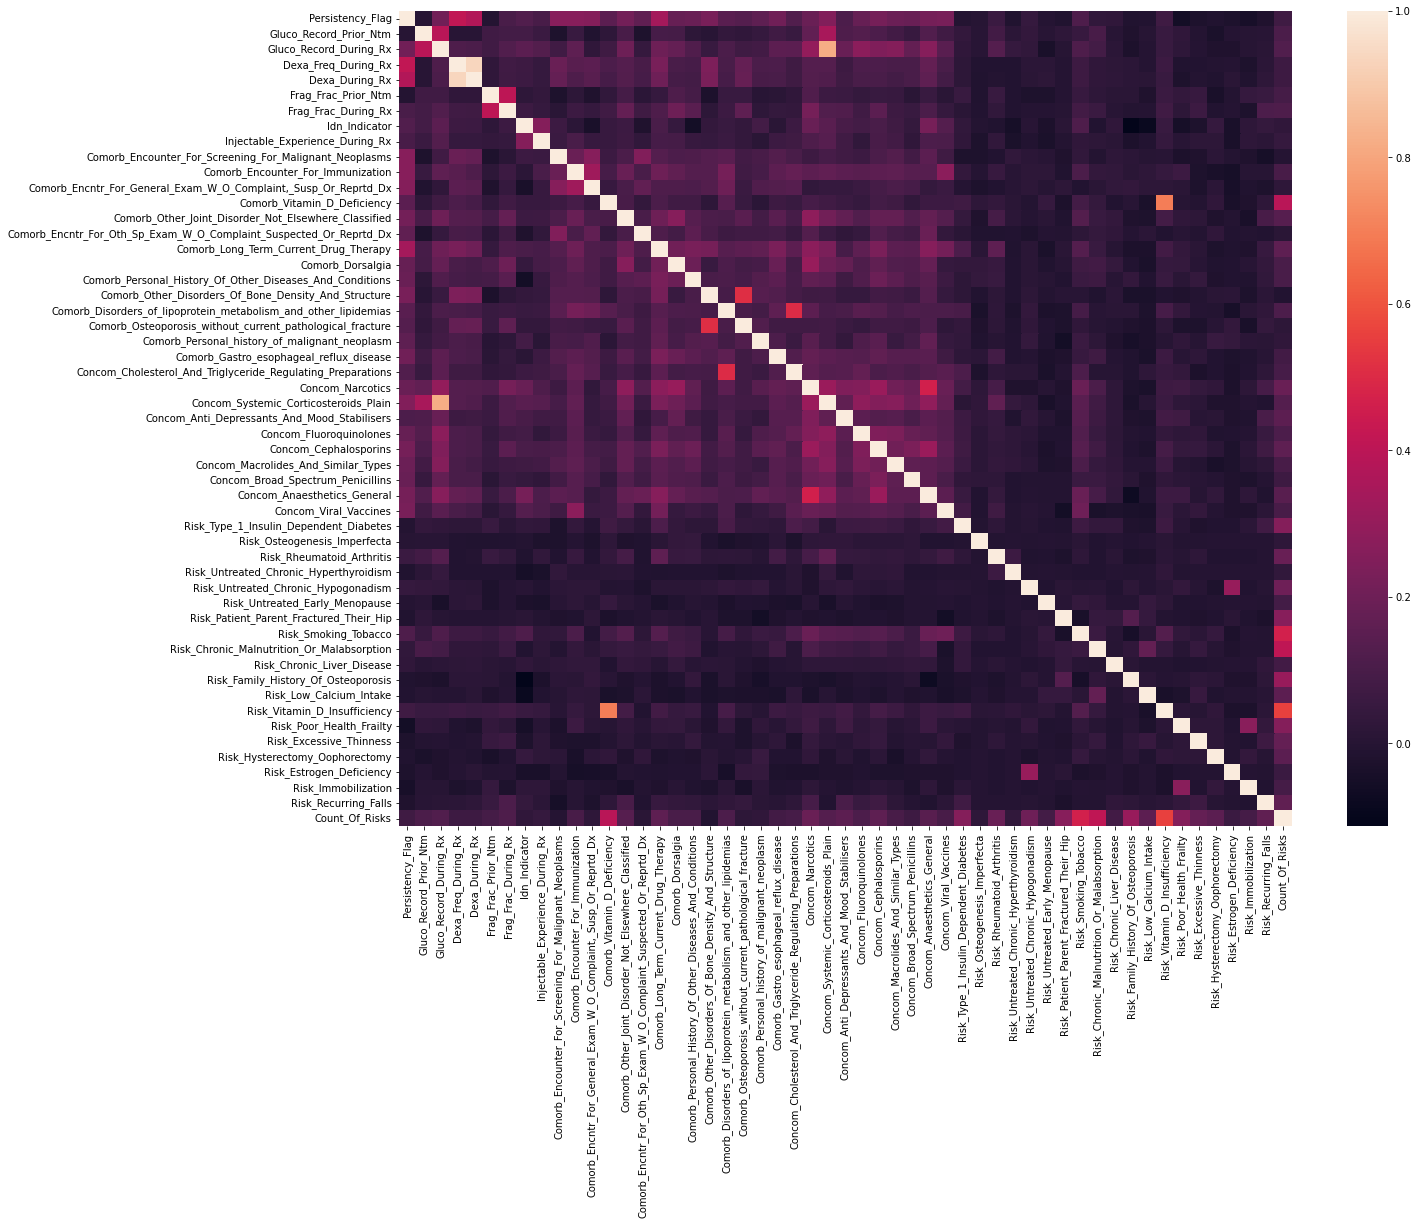

In [ ]:
plt.subplots(figsize=(20,15))
sbn.heatmap(df.corr())

In [ ]:
X=df.drop(['Persistency_Flag'],axis=1)
y=df['Persistency_Flag']

X = pd.get_dummies(X)
X.columns=[x.lower() for x in X.columns]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [ ]:
df_train = X_train.copy()
df_train['Persistency_Flag'] = y_train
df_train.head()

gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
618                        0                       0             2.333333   
406                        1                       0             1.000000   
1097                       0                       0             0.000000   
998                        0                       0             2.000000   
2925                       0                       1             0.000000   

      dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
618                1                    0                    0              1   
406                1                    1                    0              1   
1097               0                    0                    0              1   
998                1                    0                    0              1   
2925               0                    0                    0              1   

      injectable_experience_during_rx  \
618                                 1   
406                                 1   
1097                                1   
998                                 1   
2925                                1   

      comorb_encounter_for_screening_for_malignant_neoplasms  \
618                                                   1        
406                                                   0        
1097                                                  0        
998                                                   1        
2925                                                  0        

      comorb_encounter_for_immunization  ...  change_t_score_no change  \
618                                   1  ...                         0   
406                                   0  ...                         0   
1097                                  0  ...                         1   
998                                   1  ...                         0   
2925                                  0  ...                         0   

      change_t_score_unknown  change_t_score_worsened  \
618                        1                        0   
406                        1                        0   
1097                       0                        0   
998                        1                        0   
2925                       1                        0   

      change_risk_segment_improved  change_risk_segment_no change  \
618                              0                              0   
406                              0                              0   
1097                             0                              0   
998                              0                              0   
2925                             0                              0   

      change_risk_segment_unknown  change_risk_segment_worsened  \
618                             1                             0   
406                             1                             0   
1097                            1                             0   
998                             1                             0   
2925                            1                             0   

      adherent_flag_adherent  adherent_flag_non-adherent  Persistency_Flag  
618                        1                           0                 1  
406                        1                           0                 0  
1097                       1                           0                 1  
998                        1                           0                 1  
2925                       1                           0                 0  

[5 rows x 131 columns]

In [ ]:
classes=df_train['Persistency_Flag'].value_counts()
normal_share=round(classes[0]/df_train['Persistency_Flag'].count()*100,2)
fraud_share=round(classes[1]/df_train['Persistency_Flag'].count()*100, 2)
print("Non-Persistent : {} %".format(normal_share))
print("Persistent : {} %".format(fraud_share))

Non-Persistent : 69.35 %
Persistent : 30.65 %


In [ ]:
fig = px.histogram(df_train, x="Persistency_Flag", color="Persistency_Flag", title="Persistent class histogram")
fig.show()

In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_train[df_train['Persistency_Flag'] == 1], 
                                 replace=True,
                                 n_samples=len(df_train[df_train['Persistency_Flag'] == 0]),
                                 random_state=42)

df_train = pd.concat([df_train[df_train['Persistency_Flag'] == 0], df_minority_upsampled])

df_train.Persistency_Flag.value_counts()

0    1428
1    1428
Name: Persistency_Flag, dtype: int64

In [ ]:
X_train=df_train.drop(['Persistency_Flag'],axis=1)
y_train=df_train['Persistency_Flag']

In [ ]:
fig = px.histogram(df_train, x="Persistency_Flag", color="Persistency_Flag", title="Persistent class histogram")
fig.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
model = SVC(kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy upon the test data is {100*accuracy:.2f} %')

Accuracy upon the test data is 79.84 %


In [ ]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

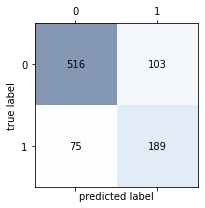

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       619
           1       0.65      0.72      0.68       264

    accuracy                           0.80       883
   macro avg       0.76      0.77      0.77       883
weighted avg       0.81      0.80      0.80       883



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confmat)
print(classification_report(y_test, predictions))

In [ ]:

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


In [ ]:
target_names=['Non-Persistent', 'Persistent']

In [ ]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sbn.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [ ]:
def logistic(X_train,X_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.79841449603624
Precision : 0.6482758620689655
Recall : 0.7121212121212122
F1 Score : 0.6787003610108303
                precision    recall  f1-score   support

Non-Persistent       0.87      0.84      0.85       619
    Persistent       0.65      0.71      0.68       264

      accuracy                           0.80       883
     macro avg       0.76      0.77      0.77       883
  weighted avg       0.80      0.80      0.80       883

AUC : 0.7736696529103637


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



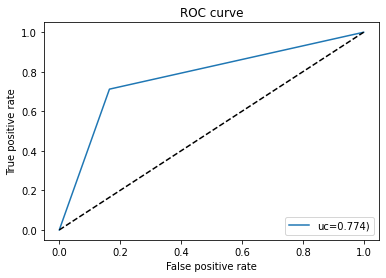

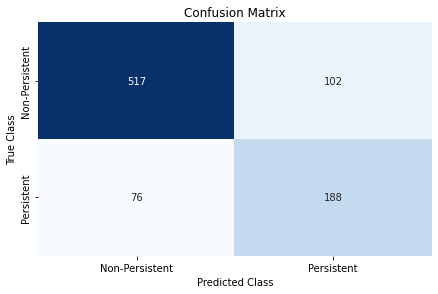

In [ ]:
logistic(X_train,X_test,y_train,y_test)

In [ ]:
def Ridge(X_train,X_test,y_train,y_test):
    #train the model
    model = RidgeClassifier(random_state=2)
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)
  

Accuracy : 0.8063420158550396
Precision : 0.6809338521400778
Recall : 0.6628787878787878
F1 Score : 0.6717850287907869
                precision    recall  f1-score   support

Non-Persistent       0.86      0.87      0.86       619
    Persistent       0.68      0.66      0.67       264

      accuracy                           0.81       883
     macro avg       0.77      0.77      0.77       883
  weighted avg       0.80      0.81      0.81       883

AUC : 0.7652035296421402


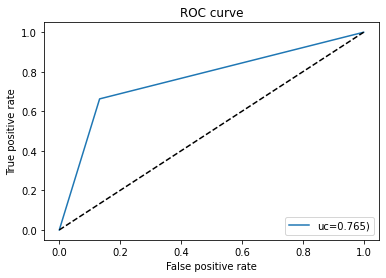

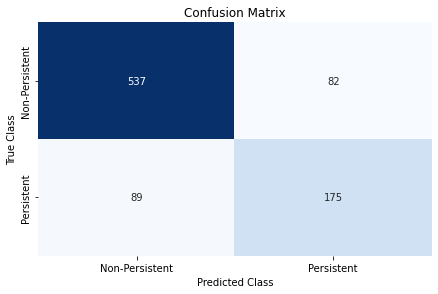

In [ ]:
Ridge(X_train,X_test,y_train,y_test)

In [ ]:
def SGD(X_train,X_test,y_train,y_test):
    #train the model
    model = SGDClassifier()
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7938844847112118
Precision : 0.6680327868852459
Recall : 0.6174242424242424
F1 Score : 0.641732283464567
                precision    recall  f1-score   support

Non-Persistent       0.84      0.87      0.86       619
    Persistent       0.67      0.62      0.64       264

      accuracy                           0.79       883
     macro avg       0.75      0.74      0.75       883
  weighted avg       0.79      0.79      0.79       883

AUC : 0.743284011357517


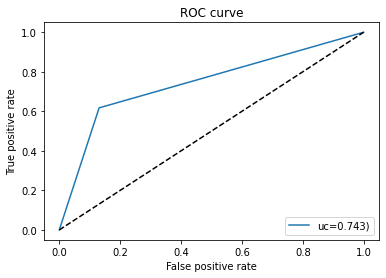

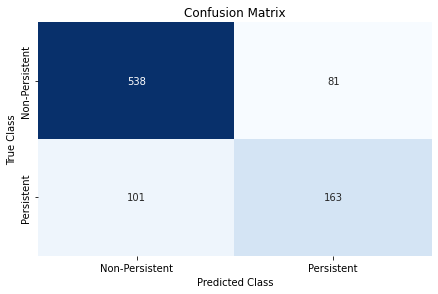

In [ ]:
SGD(X_train,X_test,y_train,y_test)

In [ ]:
def RF(X_train,X_test,y_train,y_test):
  #train the model
  model = RandomForestClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7995469988674971
Precision : 0.7377049180327869
Recall : 0.5113636363636364
F1 Score : 0.6040268456375839
                precision    recall  f1-score   support

Non-Persistent       0.82      0.92      0.87       619
    Persistent       0.74      0.51      0.60       264

      accuracy                           0.80       883
     macro avg       0.78      0.72      0.73       883
  weighted avg       0.79      0.80      0.79       883

AUC : 0.7169096049346453


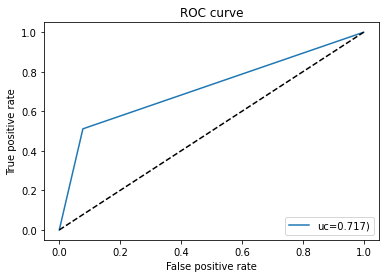

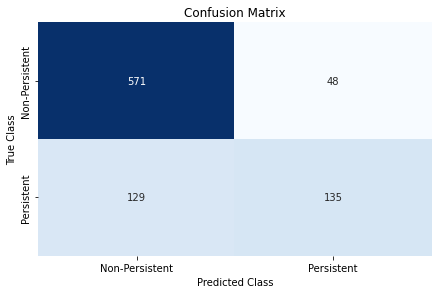

In [ ]:
RF(X_train,X_test,y_train,y_test)

In [ ]:
def Bagging(X_train,X_test,y_train,y_test):
  #train the model
  model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.8040770101925255
Precision : 0.6798418972332015
Recall : 0.6515151515151515
F1 Score : 0.6653771760154739
                precision    recall  f1-score   support

Non-Persistent       0.85      0.87      0.86       619
    Persistent       0.68      0.65      0.67       264

      accuracy                           0.80       883
     macro avg       0.77      0.76      0.76       883
  weighted avg       0.80      0.80      0.80       883

AUC : 0.7603294659029715


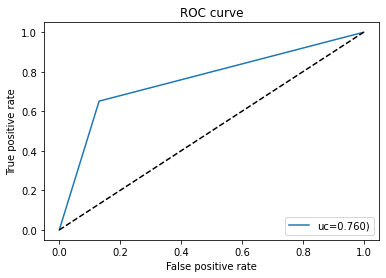

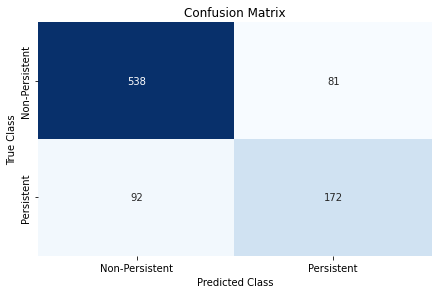

In [ ]:
Bagging(X_train,X_test,y_train,y_test)

In [ ]:
def AdaBoost(X_train,X_test,y_train,y_test):
  #train the model
  model = AdaBoostClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.8074745186862967
Precision : 0.6678571428571428
Recall : 0.7083333333333334
F1 Score : 0.6875
                precision    recall  f1-score   support

Non-Persistent       0.87      0.85      0.86       619
    Persistent       0.67      0.71      0.69       264

      accuracy                           0.81       883
     macro avg       0.77      0.78      0.77       883
  weighted avg       0.81      0.81      0.81       883

AUC : 0.7790455035002694


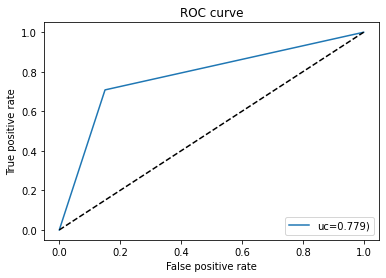

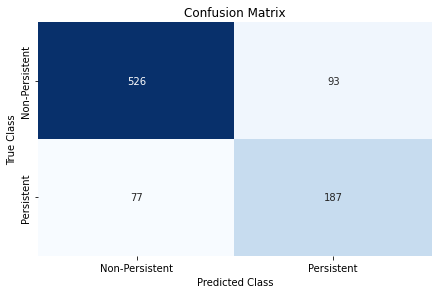

In [ ]:
AdaBoost(X_train,X_test,y_train,y_test)

In [ ]:
def ExtraTrees(X_train,X_test,y_train,y_test):
  #train the model
  model = ExtraTreesClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.8029445073612684
Precision : 0.8169014084507042
Recall : 0.4393939393939394
F1 Score : 0.5714285714285714
                precision    recall  f1-score   support

Non-Persistent       0.80      0.96      0.87       619
    Persistent       0.82      0.44      0.57       264

      accuracy                           0.80       883
     macro avg       0.81      0.70      0.72       883
  weighted avg       0.81      0.80      0.78       883

AUC : 0.6986953541880845


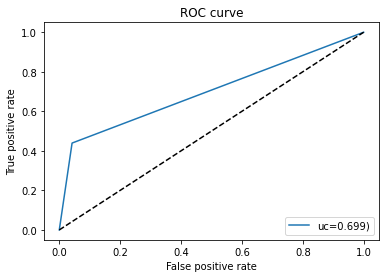

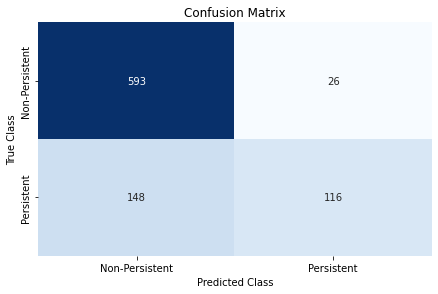

In [ ]:
ExtraTrees(X_train,X_test,y_train,y_test)

In [ ]:
def GradientBoosting(X_train,X_test,y_train,y_test):
  #train the model
  model = GradientBoostingClassifier(n_estimators = 600, max_depth = 20, min_samples_split = 4,learning_rate = 0.01, criterion='mse')
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed i

Accuracy : 0.7474518686296716
Precision : 0.5857740585774058
Recall : 0.5303030303030303
F1 Score : 0.5566600397614314
                precision    recall  f1-score   support

Non-Persistent       0.81      0.84      0.82       619
    Persistent       0.59      0.53      0.56       264

      accuracy                           0.75       883
     macro avg       0.70      0.69      0.69       883
  weighted avg       0.74      0.75      0.74       883

AUC : 0.6851838253292212


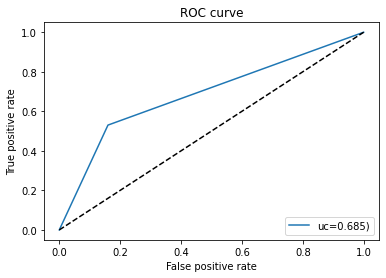

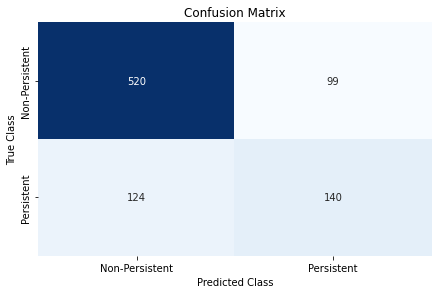

In [ ]:
GradientBoosting(X_train,X_test,y_train,y_test)

In [ ]:
def Stacking(X_train,X_test,y_train,y_test):
  #train the model
  estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
  model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy : 0.7950169875424689
Precision : 0.7292817679558011
Recall : 0.5
F1 Score : 0.5932584269662922
                precision    recall  f1-score   support

Non-Persistent       0.81      0.92      0.86       619
    Persistent       0.73      0.50      0.59       264

      accuracy                           0.80       883
     macro avg       0.77      0.71      0.73       883
  weighted avg       0.79      0.80      0.78       883

AUC : 0.7104200323101777


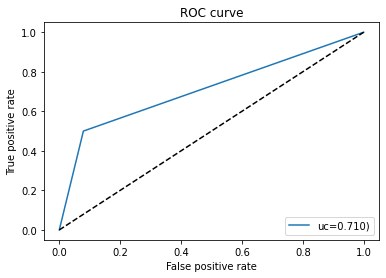

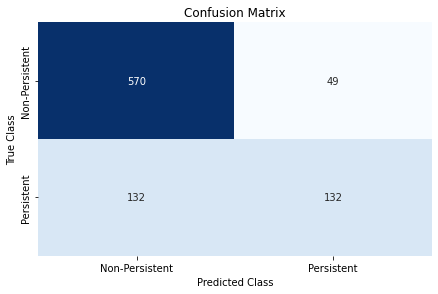

In [ ]:
Stacking(X_train,X_test,y_train,y_test)

In [ ]:
def XGBOOST(X_train,X_test,y_train,y_test):
  #train the model
  model = XGBClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.8063420158550396
Precision : 0.6795366795366795
Recall : 0.6666666666666666
F1 Score : 0.6730401529636711
                precision    recall  f1-score   support

Non-Persistent       0.86      0.87      0.86       619
    Persistent       0.68      0.67      0.67       264

      accuracy                           0.81       883
     macro avg       0.77      0.77      0.77       883
  weighted avg       0.81      0.81      0.81       883

AUC : 0.7662897145934302


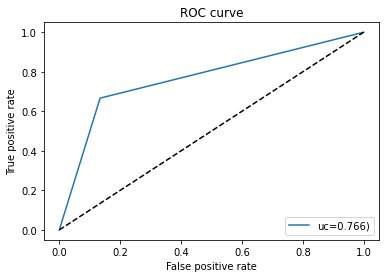

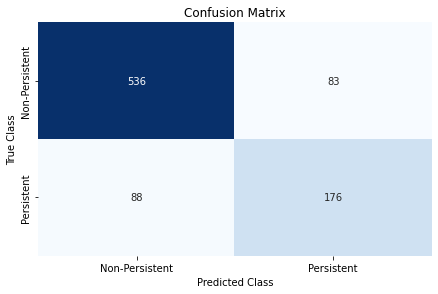

In [ ]:
XGBOOST(X_train.values,X_test.values,y_train,y_test)

In [ ]:
def MLP(X_train,X_test,y_train,y_test):
  #train the model
  mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
  mlp.fit(X_train, y_train)
  mlp.get_params(deep=True)
  #predictions
  y_pre = mlp.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7746319365798414
Precision : 0.6348547717842323
Recall : 0.5795454545454546
F1 Score : 0.6059405940594059
                precision    recall  f1-score   support

Non-Persistent       0.83      0.86      0.84       619
    Persistent       0.63      0.58      0.61       264

      accuracy                           0.77       883
     macro avg       0.73      0.72      0.72       883
  weighted avg       0.77      0.77      0.77       883

AUC : 0.7186903363195769


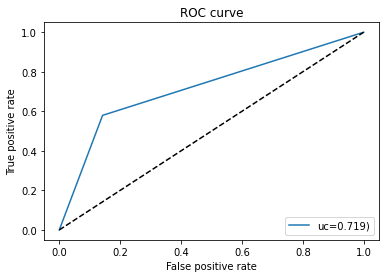

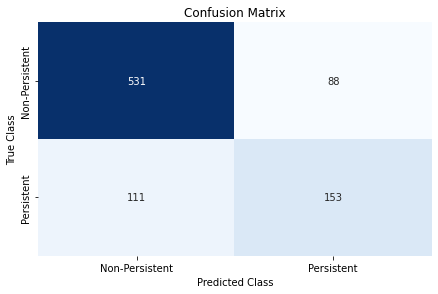

In [ ]:
MLP(X_train,X_test,y_train,y_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [ ]:
def MNN(X_train,X_test,y_train,y_test):
  #train the model
  model = Sequential()
  model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(16, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(8, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(4, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(1, activation='sigmoid'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.0001) #optimizer

  model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

  earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

  history = model.fit(X_train.values, y_train.values, epochs = 150, batch_size=10, validation_split = 0.20, verbose = 1, callbacks = [earlystopper])
  history_dict = history.history

  loss_values = history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.plot(loss_values,'b',label='training loss')
  plt.plot(val_loss_values,'r',label='val training loss')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()  

  accuracy_values = history_dict['accuracy']
  val_accuracy_values=history_dict['val_accuracy']
  plt.plot(val_accuracy_values,'-r',label='val_accuracy')
  plt.plot(accuracy_values,'-b',label='accuracy')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()

  #predictions
  y_pre = model.predict_classes(X_test)

  evaluation_metrics(y_test, y_pre, target_names)

Epoch 1/150
229/229 [==============================] - 3s 6ms/step - loss: 0.6829 - accuracy: 0.6252 - val_loss: 0.7932 - val_accuracy: 0.0000e+00
Epoch 2/150
229/229 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6239 - val_loss: 0.8072 - val_accuracy: 0.0000e+00
Epoch 3/150
229/229 [==============================] - 1s 2ms/step - loss: 0.6628 - accuracy: 0.6252 - val_loss: 0.8236 - val_accuracy: 0.0000e+00
Epoch 4/150
229/229 [==============================] - 1s 2ms/step - loss: 0.6597 - accuracy: 0.6252 - val_loss: 0.8354 - val_accuracy: 0.0000e+00
Epoch 5/150
229/229 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.6248 - val_loss: 0.8549 - val_accuracy: 0.0000e+00
Epoch 6/150
229/229 [==============================] - 1s 3ms/step - loss: 0.6413 - accuracy: 0.6257 - val_loss: 0.8722 - val_accuracy: 0.0000e+00
Epoch 7/150
229/229 [==============================] - 1s 2ms/step - loss: 0.6326 - accuracy: 0.6257 - val_loss: 0.876

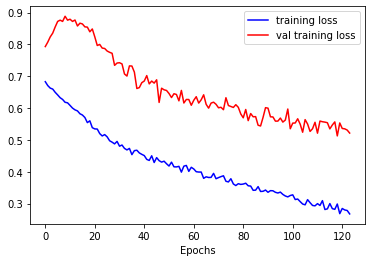

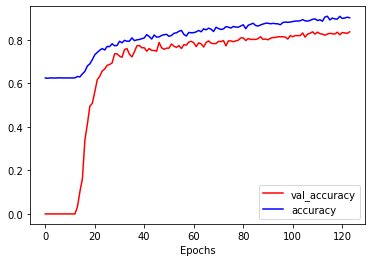

AttributeError: ignored

In [ ]:
MNN(X_train,X_test,y_train,y_test)